In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(lattice)
library(violinmplot)
library(corrplot)
library(gmodels)
library(matrixStats)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“package ‘violinmplot’ was built under R version 3.6.1”Warning message:
“package ‘corrplot’ was built under R version 3.6.1”corrplot 0.84 loaded
Warning message:
“package ‘gmodels’ was built under R version 3.6.1”
Attaching package: ‘matrixStats’

The following object is masked from ‘package:dplyr’:

    count



In [2]:
PSDS_PATH <- '/Users/annagromyko/Documents/GitHub/Statistic'

In [3]:
state <- read.csv(file.path(PSDS_PATH, 'data', 'state.csv'))
dfw <- read.csv(file.path(PSDS_PATH, 'data', 'dfw_airline.csv'))
sp500_px <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_data.csv.gz'), row.names=1)
sp500_sym <- read.csv(file.path(PSDS_PATH, 'data', 'sp500_sectors.csv'), stringsAsFactors = FALSE)
kc_tax <- read.csv(file.path(PSDS_PATH, 'data', 'kc_tax.csv.gz'))
lc_loans <- read.csv(file.path(PSDS_PATH, 'data', 'lc_loans.csv'))
airline_stats <- read.csv(file.path(PSDS_PATH, 'data', 'airline_stats.csv'), stringsAsFactors = FALSE)
airline_stats$airline <- ordered(airline_stats$airline, 
                                 levels=c('Alaska', 'American', 'Jet Blue', 'Delta', 'United', 'Southwest'))

# Introduction to statistics with R

# Table of contents
##  Introduction to Hypothesis testing
- [Sample and statistical population](#Sample-and-statistical-population)
- [Types of Variables in Statistics](#Types-of-Variables-in-Statistics)
   - [Mean](#Mean)
   - [Median](#Median)
   - [Mode](#Mode)
- [Range](#Range)
- [Variance and standard deviation](#Variance-and-standard-deviation)
   - [Variance](#Variance)
   - [Standard deviation](#Standard-deviation)
   - [Mean absolute deviation](#Mean-absolute-deviation)
   - [Variance properties](#Variance-properties)
- [Quantiles](#Quantiles)
- [Normal Distribution](#Normal-Distribution)
- [Z scores](#Z-scores)
   - [Standard normal distribution](#Standard-normal-distribution)
- [Central limit theorem](#Central-limit-theorem)
- [Confidence intervals](#Confidence-intervals)
- [99% confidence intervals](#99%-confidence-intervals)
- [Statistical Hypothesis Testing](#Statistical-Hypothesis-Testing)
- [Z - criteria](#Z---criteria)
- [Errors in hypothesis testing](#Errors-in-hypothesis-testing)


##  Categorical Data Analysys
- [Chi-Squared Distance](#Chi-Squared-Distance)
- [Pearson Distribution, Degrees of Freedom and Chi-Squared Test](#Pearson-Distribution,-Degrees-of-Freedom-and-Chi-Squared-Test)
- [Contingency Table Analysis](#Contingency-Table-Analysis)
- [P-value Calculation](#P-value-Calculation)
- [Pearson’s chi-squared assumptions](#Pearson’s-chi-squared-assumptions)


##  T- test and Analysis of Variance
- [Student's t-Distribution](#Student's-t-Distribution)
- [Student's t-Test](#Student's-t-Test)
- [QQPlot](#QQPlot)
- [Mann - Whitney test](#Mann---Whitney-test)
- [One-Way ANOVA](#One-Way-ANOVA)
- [Post Hoc Analysis](#Post-Hoc-Analysis)

## Correlation and Linear Regression
- [Definitions of Covariance and Correlation](#Definitions-of-Covariance-and-Correlation)
- [Simple Linear Regression](#Simple-Linear-Regression)
- [Predictions from Linear Regression](#Predictions-from-Linear-Regression)
- [Multiple Linear Regression](#Multiple-Linear-Regression)
Mann - Whitney test

# Introduction to Hypothesis testing

## Sample and statistical population

The set of all the objects that we want to draw a conclusion about is called the statistical **population**. In other words, statistical population is a set of all the objects which you want to generalize your result on in a scientific or applied study. Objects in the statistical populations have different properties. In our example men can have height, weight, salary, marital status and so on. Such properties are called parameters and are traditionally denoted by Greek letters. The average height of the statistical population is called a parameter. As an example the average value in the statistical population is denoted by the Greek letter μ.  

Generally we don’t have access to all the objects in the statistical population, and the parameters which we are interested in are unknown. To estimate the unknown parameters a researcher forms a **sample**. A sample is a set of observations selected from the statistical population in accordance with special rules. Then we can use the sample to make an inference about the whole population. For instance we can use average height in our sample to estimate the unknown parameter of the population. The sample mean is an example of what we call  a statistics. Pay attention to the fact that the word statistics has two different meanings. Statistics is a science and is also a characteristic of the sample.



**Statistical population**:

- All the objects a researcher want to generalize the result on. 
- Statistical characteristics of GP are called parameters.
- Generally there is no access to all the elements in the statistical population To study different characteristics of population a researcher forms a sample. 

**Sample**:

- A sample is a set of elements of statistical population formed by a researcher. 
- A sample has to be representative to reflect properties of the statistical population. 
- There is a list of techniques to form a representative sample. Statistical characteristics of sample are called statistics.

## Types of Variables in Statistics

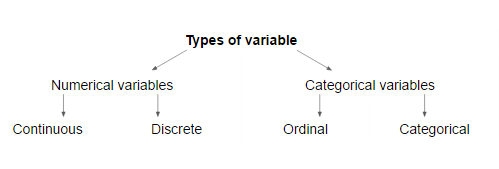

In the case of **continuous** variables we expect that our variable takes any value on a given interval. For instance, height can take any value from one to two meters. On the other hand, if our variable can take only some possible values we call it discrete. Consider the number of children in a family. This variable can be equal only to an integer number and as a result this is a **discrete** variable.

In contrast to numerical variables, **categorical** variables represent qualitative characteristics of objects and most often these variables are used to divide observations into groups. Variables of this type can be also called nominative variables or just factors. In our case, sex and marital status are categorical variables. For example, to indicate the sex of a subject we could use number one for males, and zero for females. Here numbers are just labels to indicate the sex of our subjects. All possible values of categorical variables are called levels. The variable sex has two levels: male and female. The marital status variable might have four levels: single, engaged, married and divorced.

We can also represent our data using **ordinal** variables. This kind of variable is somewhere between numerical and categorical variables. For example, we could describe temperature using a scale from freezing through cold and comfortable to warm and hot. Again, it’s impossible to say what the exact difference between the ‘cold’ and ‘warm’ is. We just know that the temperature in a ‘warm’ place is higher than in a ‘cold’ one.


We have already examined the main variable types which we are going to work with and test hypotheses about. Suppose we decided to find out if there are any differences in average height of the Russians and the English. But before we start studying the mechanism of statistical hypothesis testing we have to investigate some very important topics. In this lesson we are going to discuss how we can describe our data in terms of the central tendency measures and variation of our variable. 

Suppose we have a sample of 30 subjects and we know the height of all the subjects:

In [ ]:
sample_height <- c(172, 173, 174, 174, 174, 176, 177, 177, 177, 177, 178, 178, 179, 179, 179, 179, 179, 179, 180, 181, 181, 181, 181, 182, 182, 183, 184, 184, 185, 186)

To represent the data we can use one of the most popular plots in statistics. A frequency histogram shows us how many observations are located in a given interval. Let’s sort values of height in the first sample to understand the main idea of the plot:


In [9]:
sorted_sample_height <- sort(sample_height)
sorted_sample_height

[1] 172 173 174 174 174 176 177 177 177 177 178 178 179 179 179 179 179 179 180
[20] 181 181 181 181 182 182 183 184 184 185 186

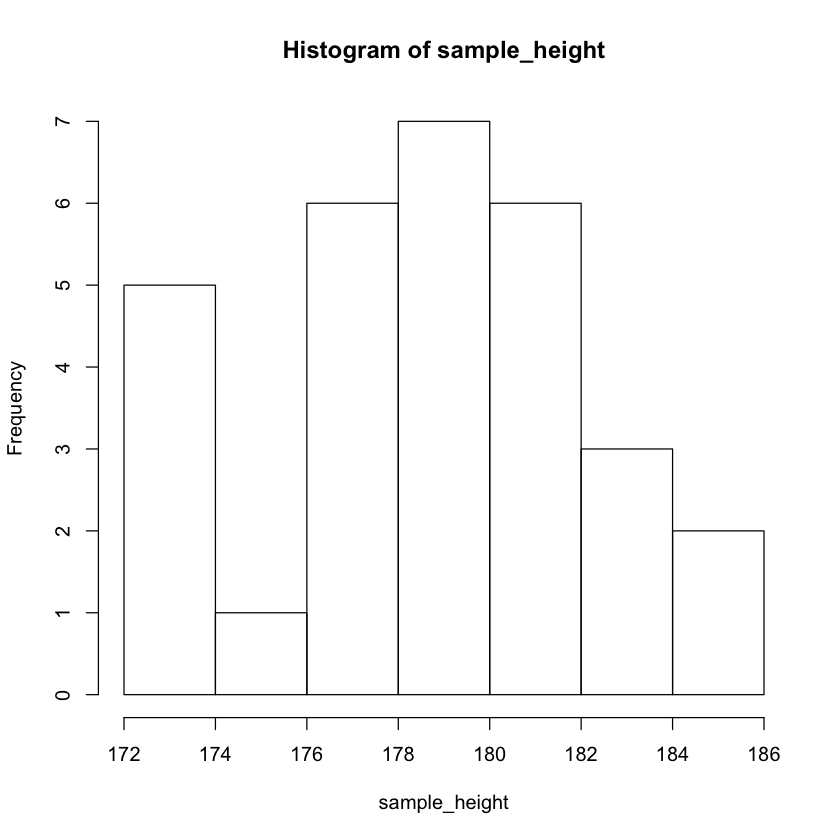

In [10]:
hist(sample_height)

### Mean


$$ \bar{X} = \frac{X_1+X_2+X_3+...+X_n}{n} = \sum \limits _{i=1} ^{n} X_i $$  
  
 
#### Weighted mean
 The **weighted arithmetic mean** is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. The notion of weighted mean plays a role in descriptive statistics and also occurs in a more general form in several other areas of mathematics.

If all the weights are equal, then the weighted mean is the same as the arithmetic mean. While weighted means generally behave in a similar fashion to arithmetic means, they do have a few counterintuitive properties, as captured for instance in Simpson's paradox.


In [15]:
#Given two school classes — one with 20 students, one with 30 students — and test grades in each class as follows:

Morning_class <- c(62, 67, 71, 74, 76, 77, 78, 79, 79, 80, 80, 81, 81, 82, 83, 84, 86, 89, 93, 98)
mean_m <- mean(Morning_class) #80

Afternoon_class <- c(81, 82, 83, 84, 85, 86, 87, 87, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 91, 91, 92, 92, 93, 93, 94, 95, 96, 97, 98, 99)
mean_a <- mean(Afternoon_class) #90

#The mean for the morning class is 80 and the mean of the afternoon class is 90. 
#The unweighted mean of the two means is 85. 
#However, this does not account for the difference in number of students in each class (20 versus 30); 
#hence the value of 85 does not reflect the average student grade (independent of class). 
#The average student grade can be obtained by averaging all the grades, without regard to classes (add all the grades up and divide by the total number of students):

weigh_mean <- sum(c(Morning_class, Afternoon_class))/sum(length(Morning_class),length(Afternoon_class))
#or
weigh_mean_1 <- sum(length(Morning_class)*mean_m, length(Afternoon_class)*mean_a)/sum(length(Morning_class),length(Afternoon_class))
#or just with simple function
weigh_mean_2 <- weighted.mean(c(Morning_class, Afternoon_class))


#### Trimmed mean
A **trimmed mean** (similar to an adjusted mean) is a method of averaging that removes a small designated percentage of the largest and smallest values before calculating the mean. After removing the specified outlier observations, the trimmed mean is found using a standard arithmetic averaging formula. The use of a trimmed mean helps eliminate the influence of outliers or data points on the tails that may unfairly affect the traditional or arithmetic mean.

### Median
Another way to describe the data is to use a **median.** The median is a value that divides sorted data into two equal parts. The sample median is denoted by the letter $M_e$

180 174 182 179 177 176 176 180 180 181 185

To calculate the median we first have to sort the data, then find a value that divides all the observations into two equal parts.

174 176 176 177 179 180 180 180 181 182 185

To find the median we just have to get the average of the two central observations: 

$$ M_e = \frac{179+180}{2} = 179.5 $$

For the same reasons that a weighted average is used, a **weighted median can also be calculated.** As with the median, we sort the data first, even though there is a weight associated with each data value. Unlike the median, the weighted median is the value where the sum of the weights is equal for the bottom and top halves of the sorted list. Like the median, the weighted median is robust to outliers.

### Mode
The last measure of central tendency is the **mode**. The mode is the most frequent value or values in a sample. The Sample mode is denoted by the symbol $M_o$. To calculate the mode we have to count the frequencies of each element in the data and then select the most frequent elements. 

In [56]:
state <- read.csv(file.path(PSDS_PATH, 'data', 'state.csv'))
# Table 1-2
state_asc <- state
state_asc[['Population']] <- formatC(state_asc[['Population']], format='d', digits=0, big.mark=',')
state_asc[1:8,]

State,Population,Murder.Rate,Abbreviation
Alabama,"4,779,736",5.7,AL
Alaska,"710,231",5.6,AK
Arizona,"6,392,017",4.7,AZ
Arkansas,"2,915,918",5.6,AR
California,"37,253,956",4.4,CA
Colorado,"5,029,196",2.8,CO
Connecticut,"3,574,097",2.4,CT
Delaware,"897,934",5.8,DE


In [4]:
mean(state[['Population']])
mean(state[['Population']], trim=0.1)
median(state[['Population']])
     

[1] 6162876

[1] 4783697

[1] 4436370

In [5]:
weighted.mean(state[['Murder.Rate']], w=state[['Population']])
library('matrixStats')
weightedMedian(state[['Murder.Rate']], w=state[['Population']])

[1] 4.445834

[1] 4.4

## Range

One of the most intuitive ways to describe the extent of variability is just to consider the distance between the biggest and the smallest values. Such a measure is called **range**. To calculate the range you just have to subtract the minimum value from the maximum value.


$$ R = X_{max} − X_{min} $$
 
Range is a really useful statistic. All other things being equal, the larger the range, the more noticeable the variation in the data will be.
However range has one great disadvantage. To calculate range we use only two data points, and that’s why range is extremely sensitive to outliers. Suppose we add only one outlier to the second sample. As a result the range in the second sample will become dramatically higher compared to the first sample. But of course it would not be really fair to conclude that the second sample has a higher level of variation in general.

## Variance and standard deviation

### Variance
**Variance** is the mean squared deviation of a variable from its mean. The higher the variance, the larger the variability of the data. And this is indeed one of the main concept in statistics and data analysis.

$$ \frac{\sum \limits _{i=1} ^{n} (x_i−\bar{X})^2}{n} $$
 

### Standard deviation
The square root of variance is called **standard deviation**. Look, first we have calculated the squared deviation to get rid of negative values and then we take the square root to return to the initial units. For example, if we measure height in meters, variance is measured in square meters, which doesn’t make much sense but standard deviation is again measured in meters.

$$ \sqrt {\frac{\sum \limits _{i=1} ^{n} (x_i−\bar{X})^2}{n}} $$

Before we go further we have to discuss a very important question, which is burning in the minds of students around the world. Why in the denominator of sample variance and standard deviation we should subtract one from the number of observations!


$$ \sigma = \sqrt {\frac{\sum \limits _{i=1} ^{n} (x_i−\bar{X})^2}{n}} $$


However, if we want to calculate the variance or standard deviation using sample data, we should subtract one from the sample size in the denominator. As a result, we have the following formulas for sample standard deviation and variance which are denoted by s and D,
respectively.


$$ sd = \sqrt {\frac{\sum \limits _{i=1} ^{n} (x_i−\bar{X})^2}{n-1}} $$

### Mean absolute deviation

The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.


$$  \frac{\sum \limits _{i=1} ^{n} | x_i−\bar{X}|}{n} $$

### Variance properties
Like the mean, the variance has some very important properties.

1. First, if we add a constant to each data point the variance remains the same. Adding a constant just shifts the distribution and doesn’t affect variability of the data. The deviations from the mean remain the same as well.

2. Second, If we multiply each observation by a constant, the standard deviation increases proportionally to the constant and the variance increases to the squared constant.

In [57]:
var(state[['Population']]) #Variance
sd(state[['Population']]) #Standard deviation
IQR(state[['Population']]) #Interquartile range is calculated as the difference of the 75% and 25% quantile.
mad(state[['Population']]) #Median absolute deviation

[1] 4.689833e+13

[1] 6848235

[1] 4847308

[1] 3849870

## Quantiles

Quantiles are the values of the variable which divide the sorted data into some equal groups of observations. Actually we have already met one of them, the median. Median value is a quantile that divides data into two equal parts. We can also divide data into four equal groups using three values. These values are called quartiles.

Let’s go back to our sample and find the quartiles. Let’s sort the data first, then find the median (180) and then divide each half into two equal parts as well (176 and 181).

Now each given interval contains 25 percent of all observations. Quartiles are very useful to describe the data, for instance 50 % of the observations fall between the first quartile and the third quartile, or we can say that only 25 % of the observations are greater than third quartile. We can also use quartiles to represent variation in the data. **Interquartile range (IQR)** is the difference between the first and the third quartile. This measure is similar to the range but now we discard 25 % observations from both sides. As a result IQR is robust to outliers. The smaller the IQR value, the closer the observations are to each other and vice versa. Large IQR corresponds to a high level of variation in the data.

So, the quartiles are three values which divide the data into four equal groups, but sometimes it might be useful to divide the data into smaller parts. For instance, we can divide the data into 100 equal parts using 99 points. These 99 points are called percentiles. Let’s get a bigger sample to demonstrate it. Vertical lines on the plot are percentiles. Each intervals contains 1% of observations.

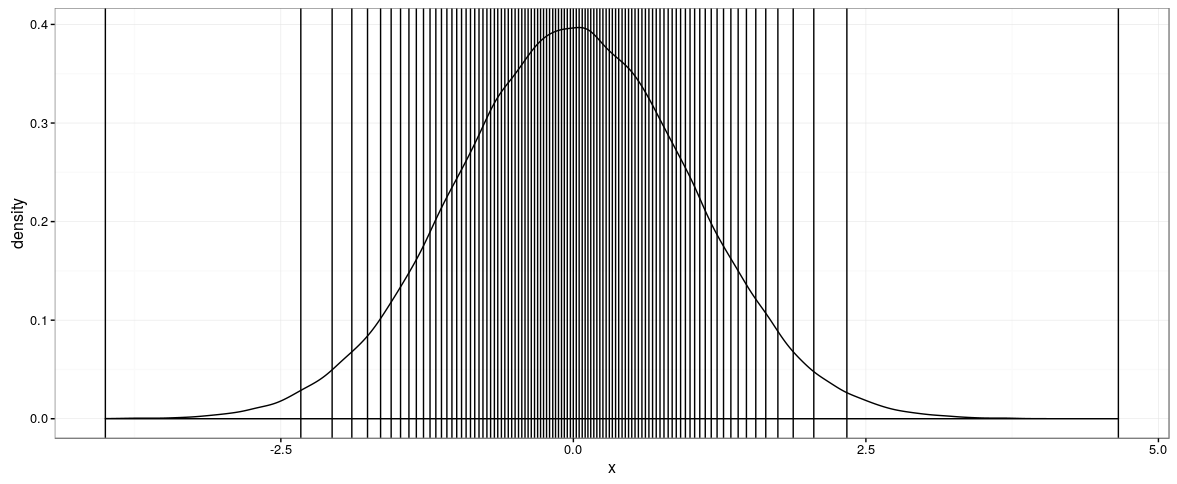

In [19]:
quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95))

5%   25%   50%   75%   95% 
1.600 2.425 4.000 5.550 6.510

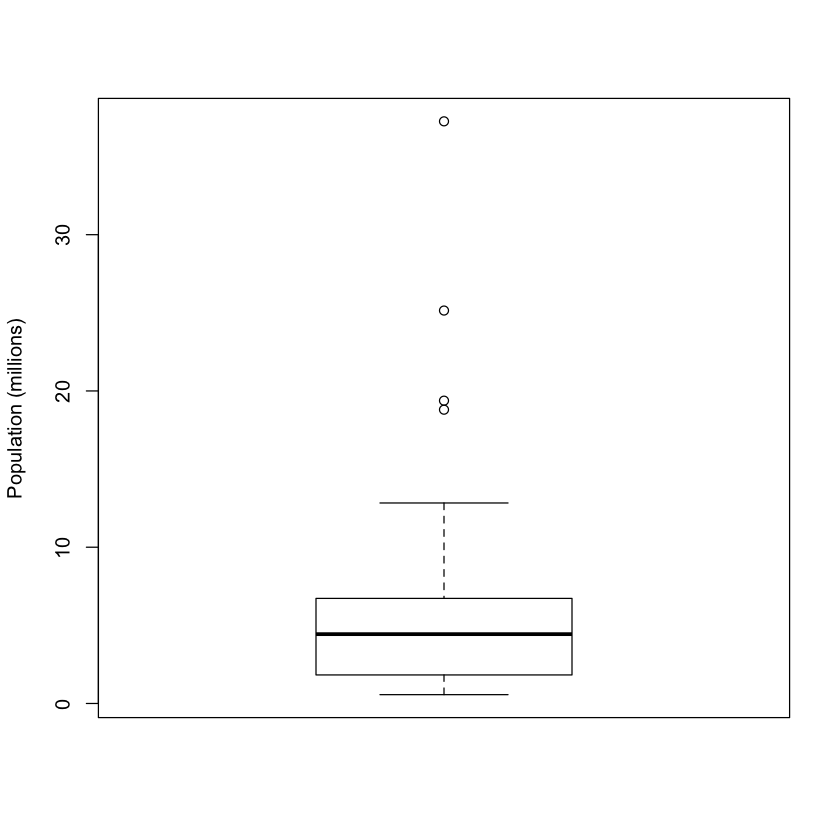

In [20]:
boxplot(state[['Population']]/1000000, ylab='Population (millions)')

### Frequency Table and Histograms
The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [21]:
breaks <- seq(from=min(state[['Population']]), 
              to=max(state[['Population']]), length=11)
pop_freq <- cut(state[['Population']], breaks=breaks, 
                right=TRUE, include.lowest=TRUE)
state['PopFreq'] <- pop_freq
table(pop_freq) #frequency table
     


pop_freq
[5.64e+05,4.23e+06]  (4.23e+06,7.9e+06]  (7.9e+06,1.16e+07] (1.16e+07,1.52e+07] 
                 24                  14                   6                   2 
(1.52e+07,1.89e+07] (1.89e+07,2.26e+07] (2.26e+07,2.62e+07] (2.62e+07,2.99e+07] 
                  1                   1                   1                   0 
(2.99e+07,3.36e+07] (3.36e+07,3.73e+07] 
                  0                   1 

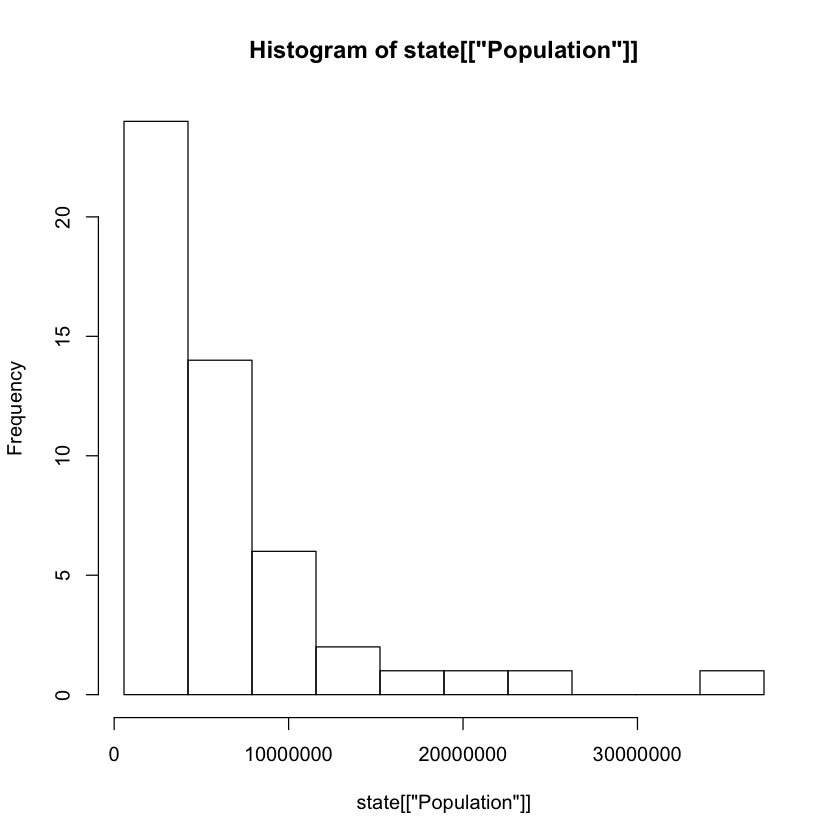

In [22]:
options(scipen=5)
hist(state[['Population']], breaks=breaks)

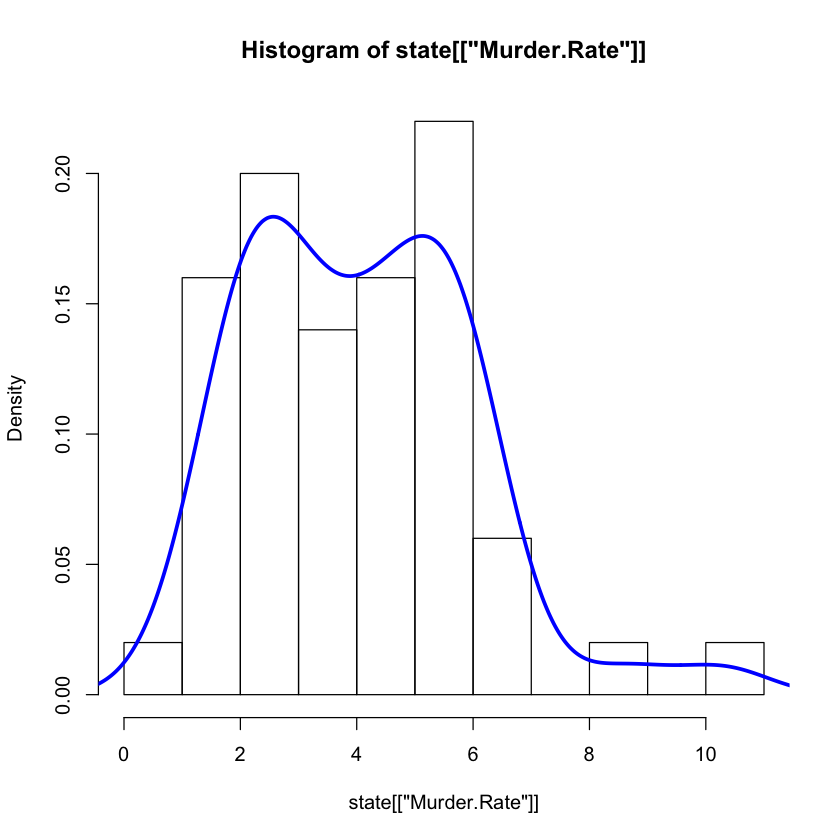

In [23]:
hist(state[['Murder.Rate']], freq=FALSE )
lines(density(state[['Murder.Rate']]), lwd=3, col='blue')

### Barplot

In [24]:
dfw <- read.csv(file.path(PSDS_PATH, 'data', 'dfw_airline.csv'))

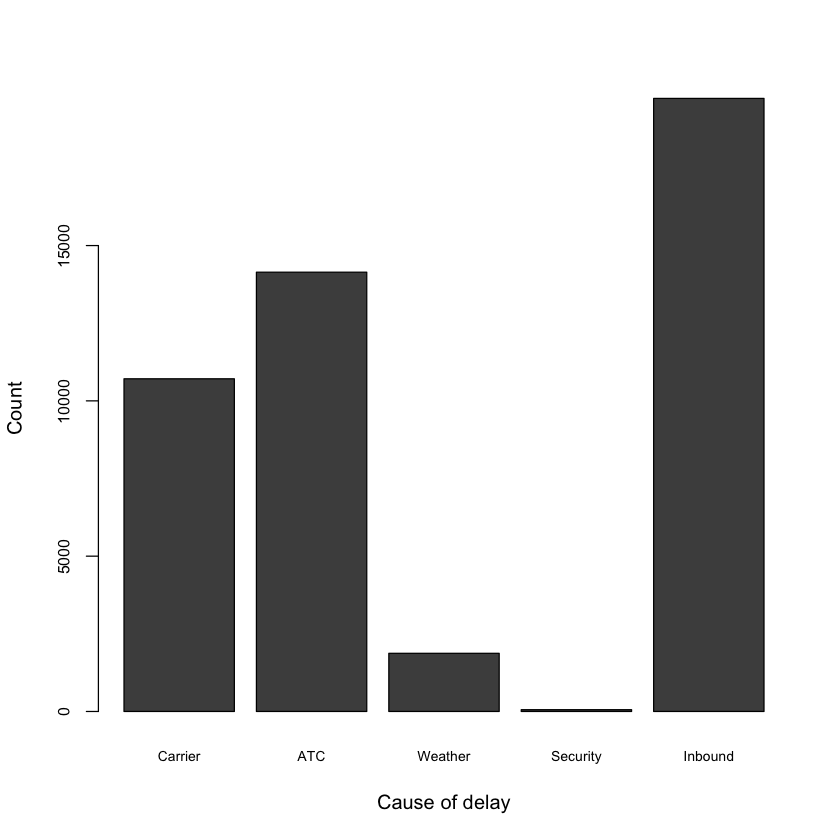

In [27]:
barplot(as.matrix(dfw) / 6, cex.axis=0.8, cex.names=0.7, 
        xlab='Cause of delay', ylab='Count')

## Normal Distribution

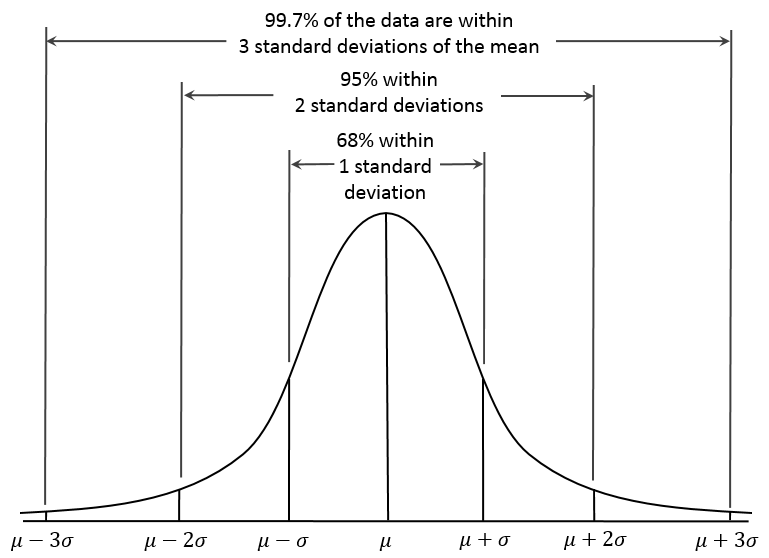

### Example

Suppose we have a normal distribution with mean value of 100 and variance of 25 (M=100, D=25). Then 95% of observations will fall between

In [1]:
mean <- 100
variance <- 25
sigma <- sqrt(variance)
min_95 <- mean - 2*sigma
max_95 <- mean + 2*sigma
min_95; max_95

[1] 90

[1] 110

## Z scores

### Standard normal distribution
Well the key aspect of normal distribution is the fact that we are able to calculate the probability that a randomly chosen observation will exceed the given deviation from the mean. For instance if we know that only 5 % of observations fall above plus minus  two standard deviation (2.5 % on each side of the distribution) then the probability that a random picked observation will fall above two sd from the mean is equal to 0.025. In other words, the probability of observing data point higher or equal to the mean plus two sd equals 0.025. To make our interaction with normal distribution more comfortable we can transform the data in such a way that the mean of the distribution will be equal to zero and sd will be equal to one. This distribution is called **standard normal distribution** or just z - distribution.  

$$ z_{i} = \frac{x_{i} - \bar{X}}{sd} $$  


### Example

We will often use the z transformation to solve some applied tasks. Let’s consider an example. IQ scores are supposed to be distributed normally with mean equal to 130 and sd equal to 15. The task is to calculate how many people have IQ greater than 142. Let’s find the answer using properties of normal distribution and z - transformation. 

In [19]:
x_i <- 142
mean <- 130
sd <- 15

z_score <- function(x_i, mean, sd) {
    return((x_i-mean) /sd)}

z <- z_score(x_i, mean, sd)

p_value <- pnorm(z, lower.tail=FALSE)
p_value



[1] 0.2118554

In [11]:
#Test with one tail on the left 
pnorm(q=-1.8, lower.tail=TRUE)

#Test with the right tail
pnorm(q=1.8, lower.tail=FALSE)

#Test with two tails
2*pnorm(q=1.24, lower.tail=FALSE)

# qnorm in r - function to calculate z score in with given p_value
qnorm(0.0359303191129258)


[1] 0.03593032

[1] 0.03593032

[1] 0.2149754

[1] -1.8

### Example

IQ is believed to be distributed according to the normal distribution with mean of 100 and standard deviation of 15 (M=100, SD=15). 
How many people have IQ above 125?
How many people have IQ somewhere between 70 and 112

In [21]:
x_i <- 125
mean <- 100
sd <- 15

z <- z_score(x_i, mean, sd)

print(c("Z_score for 125 is :", z))
print(c("P_value for 125 is :", pnorm(q=z, lower.tail=FALSE)))

x_1 <- 70
x_2 <- 112
z_1 <- z_score(x_1, mean, sd)
z_2 <- z_score(x_2, mean, sd)

print(c("P_value for  interval 70-112 is :", 1- (pnorm(q=z_1, lower.tail=TRUE) + pnorm(q=z_2, lower.tail=FALSE))))

[1] "Z_score for 125 is :" "1.66666666666667"    
[1] "P_value for 125 is :" "0.0477903522728147"  
[1] "P_value for  interval 70-112 is :" "0.765394469468424"                


## Central limit theorem

Well we have discussed all the main questions to go further. Let’s consider one of the central theme in statistics, the central limit theorem. Suppose we have a normally distributed population with mean 20 and standard deviation 10. Imagine that we constantly form samples of the same size equal to 30. Please note an important issue we form samples with replacement. This means that if an observation x1x1 was in the first sample, it still has the same chance to became an element of the second sample. Suppose we randomly choose 30 elements and then put them back to the population. We will use the term “sample distribution” to refer to the observed distribution of the variable in each sample. Now we calculate the mean in each sample. It’s easy to see that sample mean does not match the population mean perfectly. (You can use this [website]("https://gallery.shinyapps.io/CLT_mean/) to replicate the data below.)

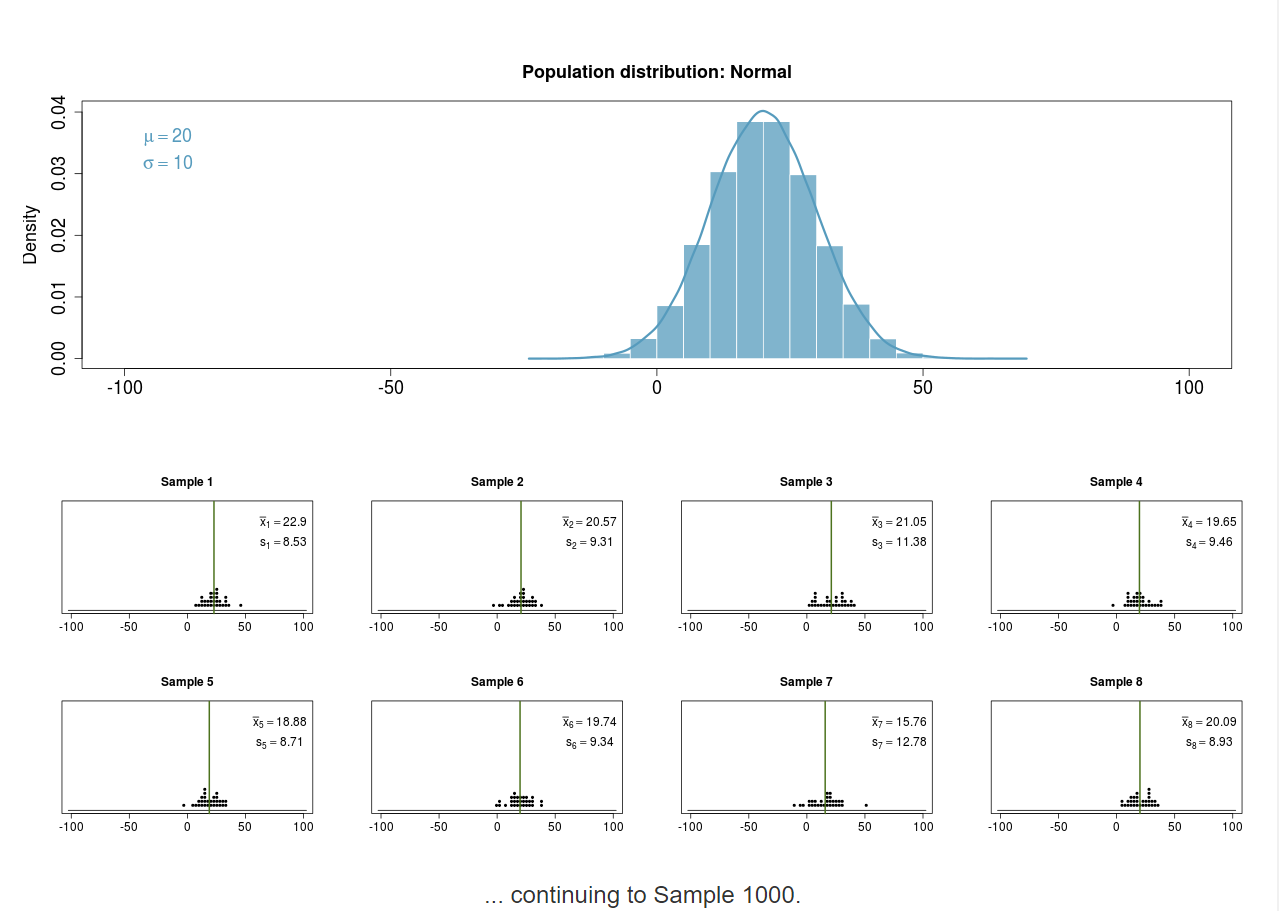

There is some variation of the sample means. Some of them fall very close to the population mean while others deviate from the population mean greatly. Now after we have calculated the mean in each sample let’s plot the distribution of the sample means. This distribution is called sampling distribution. So don’t mix these two very similar definitions, sample and **sampling distribution.**


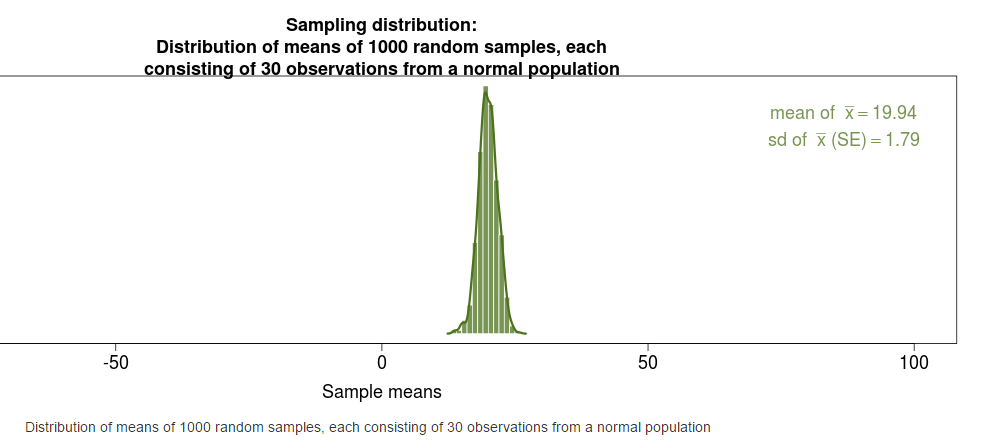

The main thing for us is the sampling distribution will be symmetric, unimodal and that more important it will be approximately normal. Let’s try to understand the nature of this distribution. If we are interested in the true value of the population mean the best way to estimate it is to repeatedly form samples and then take the average of the sample means. The more samples we have, the more accurate our estimation is. And if we imagine that we formed infinite number of samples the average of the sample means will be equal to the mean in general population.

To understand the main idea suppose we have bow and arrows and try to shoot a center of the target. Then each shot can have some deviations however in general our result would be approximately perfect. Now just imagine that each sample is a shot to get a population mean.

## Standard error

Standard error is equal to the standard deviation divided by squared root of the sample size. Try to understand the main idea. We have already discussed that the greater the standard deviation in population, the greater the standard error, and we can see this value in the numerator of the formula. And the smaller the sample size, the higher the error — as the sample size is in the denominator.

Standard error is the standard deviation of the sampling distribution. 

$$ se = \frac {\sigma} {\sqrt{n}} $$
  

### Example

Calculate the standard error of the mean if the mean value equals 10, variance equals 4 and sample size equals 100

In [25]:
mean <- 10
variance <- 4
sample_size <- 100

se <- sqrt(variance)/ sqrt(sample_size)
se

[1] 0.2

## Bootstrap

As the calculation uses random samples, results will vary between runs

In [10]:
library(boot)


Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma



In [8]:
loans_income <- read.csv(file.path(PSDS_PATH, 'data', 'loans_income.csv'))
loans_income <- loans_income[, 1]   # convert data frame to vector

In [11]:
stat_fun <- function(x, idx) median(x[idx])
boot_obj <- boot(loans_income, R=1000, statistic=stat_fun)

boot_obj


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = loans_income, statistic = stat_fun, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    62000 -84.798     228.001

## Confidence intervals

We are ready to solve our first statistical problem. We will try to estimate the population mean using sample data. We have already mentioned that we could repeatedly form samples and then take the average value of the sample means. This approach does really work well. However, in real practice we don’t have an opportunity to form samples countless times. Generally we have one sample and we want to estimate the population mean using given data.

Let’s consider how we can do it and how the central limit theorem can help us. Suppose we have a general population with unknown mean and variance equal to 4. Of course this example is artificial — in real situation we don’t know variance in the population either. But now it helps us to understand the main idea of computing confidence intervals and hypothesis testing.

So now we have population with unknown mean and sample data to estimate it. We have only one sample of 25 observations with sample mean equal to 10.

In [29]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


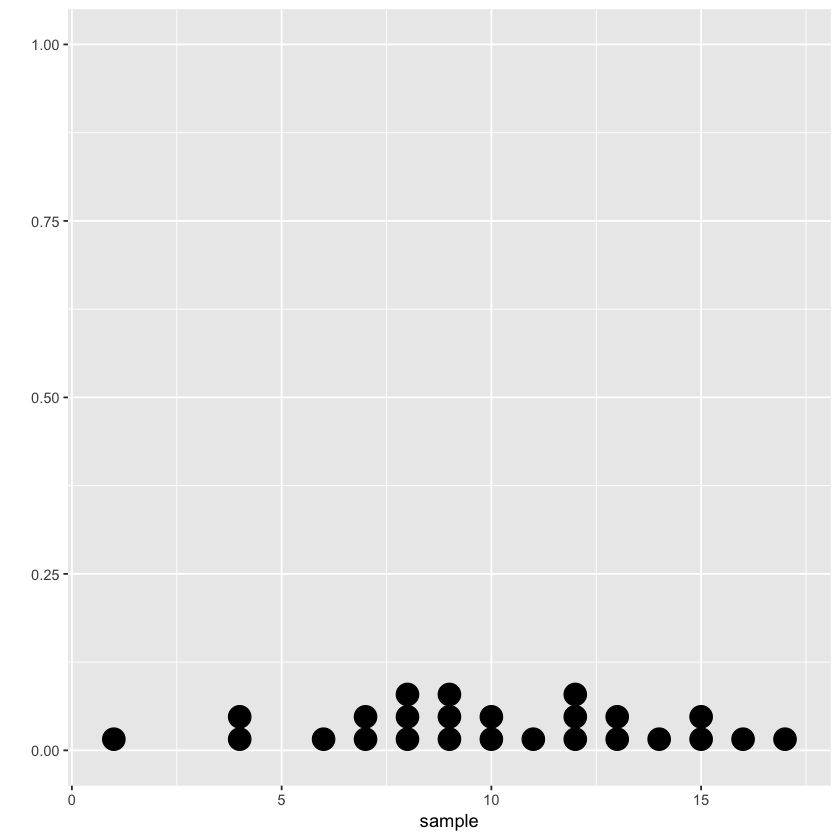

In [31]:
sample <- c(14, 7, 8, 8, 4, 6, 11, 4, 15, 15, 12, 13, 9, 10, 1, 8, 16, 12, 7, 13, 9, 10, 17, 12, 9)

qplot(sample, geom = "dotplot")


In fact, the sample mean can be used as an estimate. Indeed, if we have only one sample and we want to estimate the general population mean, the sample mean would be our best guess. And we would call sample mean as a point estimation. Because we use only one value to estimate the parameter.

 

However let’s imagine that we repeatedly form samples of the same size. We already know that sampling distribution of the sample means would be normal with mean asymptotically equal to the mean in the general population. However, this information doesn’t help a lot. Indeed, our sample mean could fall anywhere on this plot. It might be very close to the parameter or it’s also possible that the sample mean could deviate from the population mean greatly. And we still know nothing about the value of the parameter. Is it in fact possible to say something about the quality of our point estimation though? Is it possible to find out the value of the mean in the general population.

I have two news, a bad and a good one. The bad news is that we are will not be able to say what is a precise value of the parameter we are interested in. However, we can find an interval which most likely contains the unknown parameter. This interval is called a confidence interval. And this kind of estimation is called interval estimation. 


Well now, how to find this interval? First, let’s calculate the standard deviation of sampling distribution, or the standard error. The key idea is that if we have only one sample ($n = 25,  \bar{X} = 10 $ )  but know standard deviation in the population ($ \sigma = 4 $) , we are able to calculate standard error of the theoretical sampling distribution.

$ se = \frac {\sigma} {\sqrt{n}} = \frac {4} {\sqrt{25}} = \frac {4} {5} = 0.8 $


Remember that sampling distribution is an approximately normal. Now, let’s recall the three-sigma rule. Approximately 95 percents of all sample means would fall into the interval population mean plus minus one point ninety six standard errors. Great but still not very useful. As we remember, our sample mean could be anywhere. Or we can look at this fact from the other perspective. If we repeatedly form samples, and in each sample we calculate the interval sample mean±1.96∗se, then in 95 % of the all cases this interval would catch the general population mean. And only 5 % of the samples would not catch the population mean in that interval. You can see a great demonstration here.

Now let’s calculate this confidence interval for our sample data.  We need sample mean, standard error and sample size. Then the upper limit equals:

$ 10 + 1.96*0.8 = 11.568$

while the lower limit equals:

$ 10 - 1.96*0.8 = 8.432$

## 99% confidence intervals

But what if we want to increase the confidence that the interval contains true mean? Well, we can calculate a wider interval easily. In the previous lesson we used the z value equal to 1.96 because in the standard normal distribution the interval mean plus minus 1.96 sd contains approximately 95 % of observations. As a result 95 % of samples in sampling distributions contain the true mean in their CI. And we can say that such confidence interval has 95 % level of confidence. But we can increase our confidence level and use 99 % interval. Let’s consider how to calculate it. 

First find the z value which allows us to calculate the interval which contains 99 % of observations in a standard normal distribution. Using properties of normal distribution we can find out that the interval equal to mean±2.576∗se contains 99 % of observations.  As a result if we use this z value to calculate CI we increase the confidence level to 99 %.


In [35]:
#Calculate 99% confidence interval for the following example: M = 10, sd = 5, n = 100.

M <- 10
sd <- 5
n <- 100

min <- M - 2.576*(sd/sqrt(n))
max <- M + 2.576*(sd/sqrt(n))
min; max

[1] 8.712

[1] 11.288

## Statistical Hypothesis Testing

To understand how we can test statistical hypothesis we will use the following example. Imagine you are a doctor again. We discovered a new drug which reduces the period of curing and want to prove its efficiency. 

Suppose we know a distribution of curing period in general population of patients which were treated by an old version of drug. This distribution has mean equal to 10 and sd equal to 4. This a tricky question how do we know the parameters in population actually. Just let’s suppose that the old drug has been used for a very long time and we know how it works. Of course it still sounds a little artificial. But it’s ok. On the first step we will start from completely artificial example to demonstrate how statistics works in some ideal situation when we know both parameters (mean and sd) in population. Then we will move from the ideal situation to the real one. On the second step we will discuss what happens if we do not know the variance in the population. Then we will consider an example when we know neither population mean nor population variance.

The main idea of statistical inference is that it’s always easy to test the inverse hypothesis. Let’s formulate our initial hypothesis in terms of absence of any expected differences. Well we can say that the mean curing period of new drug is absolutely the same to compare with the old drug. This hypothesis we call a null hypothesis. Because it tells us that nothing interesting is going on: there is no difference at all.

In contrast, the alternative hypothesis tells us that we are right. And the new drug does really differ from the old one. We can formulate the alternative hypothesis as the mean curing period of new drug is not equal to the old one mean.

## Z - criteria

To test a new drug we collected data of 16 subjects and we discovered that the drug reduces the period of curing. Sample mean is equal to 8. Remember we assume that the distribution of curing period in general population is equal to 10 with sd equal to 4. We can see that the sample mean does differ from the population mean. However its possible that this difference occurred only by chance and our sample belongs the general population with mean equal to 10. In other words the new drug dose not reduces the period of curing at all. In contrast it still can be that our sample does not belong the general population with mean equal to 10 and the new drug does do better. How we can choose the right answer?

We start by assuming that the null hypothesis is true. Then if the null hypothesis is true then general population has mean equal to 10 and sd equal to 4.  Now let's perform familiar procedure. Suppose the null hypothesis to be true we constantly form samples of the same size equal to 16. It's easy to simulate this process as we did it discussing the central limit theorem. 

Suppose we form the sample of the same size countless times. We have calculated mean of each sample and plot the sampling distribution. We have already understood that this distribution is normal with mean equal to the mean in general population and standard deviation is equal to standard error, or standard deviation of variable in general population divided by square root of sample size. We can see that the sample mean deviates from the population mean. The main question is how possible to observe such or more extreme deviation of sample mean from the parameter (the mean in the population) as we did.  

To answer this question we have to compute how far the sample mean deviates from the population mean in terms of standard error. For that purpose we subtract population mean from each observation and divide the result by standard error. 

$ z = \frac {\bar{X} - \mu} {se} =  \frac {\bar{X} - \mu} {\frac {\sigma} {\sqrt{n}}}  = \frac {8-10} {\frac {4} {\sqrt{16}}} = -2$

As a result we get Z - value. What’s a probabilities to observe such or more extreme deviation in standard normal distribution? Let’s find the answer using the [online calculator](https://gallery.shinyapps.io/dist_calc/).

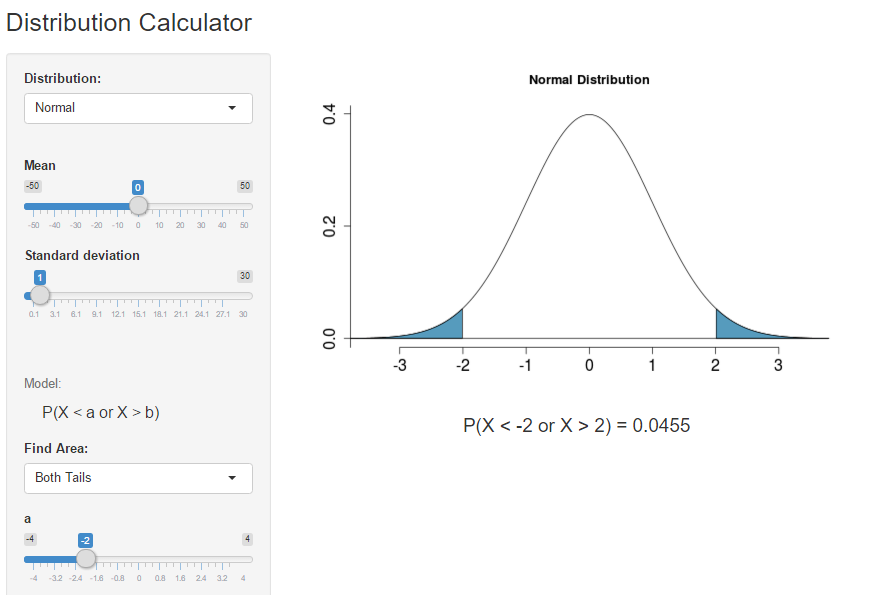

In [38]:
# or we can use pnorm function
2*pnorm(q=-2, lower.tail=TRUE)

[1] 0.04550026

And now the most interesting part begins. How we decide if it possible to reject the null hypothesis? We can see that calculated probabilities is really small. In other words, the probability to get such or more extreme deviation only by chance is approximately equal to p. And we can conclude that the sample data has a significant evidence in favor of the alternative hypothesis.

This is the main logic of hypotheses testing on the first step we assume that the null hypothesis is true then we calculate the probability to observe given or more extreme deviation between the predictions of the null hypothesis and a sample data. If the probability is really small the we reject the null hypothesis and accept the alternative one.

How small is small enough to reject the null hypothesis? That’s is a really debatable question we will discuss it in more details later. However, a standard recommendation is to use 0.05 as a threshold for pilots studies. The threshold that we set to make a decision should we reject the null hypothesis is denoted by the greek letter alpha.  Thus, if the p-value is smaller than 0.05 we reject the null hypothesis and accept the alternative one; in other case we don’t reject the null hypothesis. In case of rejection of the null hypothesis we say that we have statistically significant evidence in favor of alternative hypothesis.

## Errors in hypothesis testing

Moreover, there are even two wrong decisions we can make testing the hypothesis. Remember, if we have p-value smaller than 0.05 it’s still possible that the null hypothesis is really true, and by rejecting it we would make an error. We accept the alternative hypothesis while the null hypothesis should have been accepted instead. This type of error is called the first type error.

Now consider another situation, when we tested a hypothesis and got p-value equal to 0.4. Well, we did not reject the null hypothesis even in fact the alternative hypothesis was true. This kind of error is called second type error. In other words, type I error is a false alarm (or false positive) and type II error is a false negative reaction. 

### Example

Mean score for all Introduction to statistics learners so far equals 115, but the mean score for a random sample of 144 learners of the 2015 session was 118 (sd = 8). Calculate the p-value if the null hypothesis is the following: mean score for the 2015 session was 115. 

In [48]:
mean <- 115
s_mean <- 118
sd <- 8
n = 144

z <- (s_mean - mean) / (sd / sqrt(n))
z

2*pnorm(z, lower.tail = F)

[1] 4.5

[1] 6.795346e-06

In [180]:


#calculate the 95% confidence interval for the mean for our example about testing a new drug.
n <-64
sd <- 4
M <- 18.5

min <- M - 2.576*(sd/sqrt(n))
max <- M + 2.576*(sd/sqrt(n))
min; max

[1] 17.212

[1] 19.788

# Categorical Data Analysys

There are two main types of questions and hypotheses being tested which we could face when we analyze categorical data.
- We want to test whether the distribution of a categorical variable differs from some pre-defined theoretical distribution. 
- We want to explore relationship of two categorical variables.

## Chi-Squared Distance

We first calculated the difference between the observed and expected values for each column, then we realized that this difference should be treated differently depending on the expected frequency value. Once more: the higher the expected frequency, the greater difference between the observed and expected values is possible. So,  we divided this difference by the square root of the expected frequency and, to get rid of the nature of difference — we don’t need to know whether we got greater of less than expected, we only need to know the difference, we squared the values. We did this for every column, then summed up the values and got the value—and here is the **Pearson chi-squared distance.**

$$ \sum_{1}^n \frac{(O-E)^2}{E} $$

### Example

In [181]:
generator <- function(set) function(n) sample(set, n, replace=T)
    
coin_generator <- generator(c("Heads", "Tails"))

n <-  60

observed <- coin_generator(n)

heads <- length(observed[observed == "Heads"])
tails <- length(observed[observed == "Tails"])

df <- data.frame(observed=c(heads, tails), expected=c(n/2, n/2))
rownames(df) <- c("Heads", "Tails")

df

chi_sq_distance <- sum((df$expected-df$observed) ** 2 / df$expected)

print(c("Pearson chi_squared_distance is :", chi_sq_distance))
print(c("P-value is:", pchisq(chi_sq_distance, df = 1, lower.tail = F)))

,observed,expected
Heads,25,30
Tails,35,30


[1] "Pearson chi_squared_distance is :" "1.66666666666667"                 
[1] "P-value is:"       "0.196705602458947"


In [182]:
observed <- c(18, 55, 27)
expected <- c(25, 50, 25)

sum((expected-observed) ** 2 / expected)

[1] 2.62

## Pearson Distribution, Degrees of Freedom and Chi-Squared Test

If the null hypothesis were true and we were repeating the experiment over and over again, how would this the chi-squared distance behave? The **chi-squared distance** behaves in accordance to a special distribution called **chi-squared distribution.**

We can repeatedly run our experiment, calculate the chi-squared distance value in each run and save the data. Here is a small R function for this task.

In [87]:
simulate_chi_squared <- function(size, prob, trials){
    heads <- rbinom(n = trials, prob = prob, size = size) 
    tails <- size - heads
    expected <- prob * size
    distances <- (heads - expected)^2 / expected + (tails - expected)^2 / expected
    print(hist(distances, breaks = 20, col = "blue", las=1))}

$breaks
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25

$counts
 [1] 728312 138522  44483  53700  14022   8907   5329   3168   1704      0
[11]    938    488    239      0     98     65      0     15      0      7
[21]      0      2      0      0      1

$density
 [1] 0.728312 0.138522 0.044483 0.053700 0.014022 0.008907 0.005329 0.003168
 [9] 0.001704 0.000000 0.000938 0.000488 0.000239 0.000000 0.000098 0.000065
[17] 0.000000 0.000015 0.000000 0.000007 0.000000 0.000002 0.000000 0.000000
[25] 0.000001

$mids
 [1]  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5
[16] 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5

$xname
[1] "distances"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


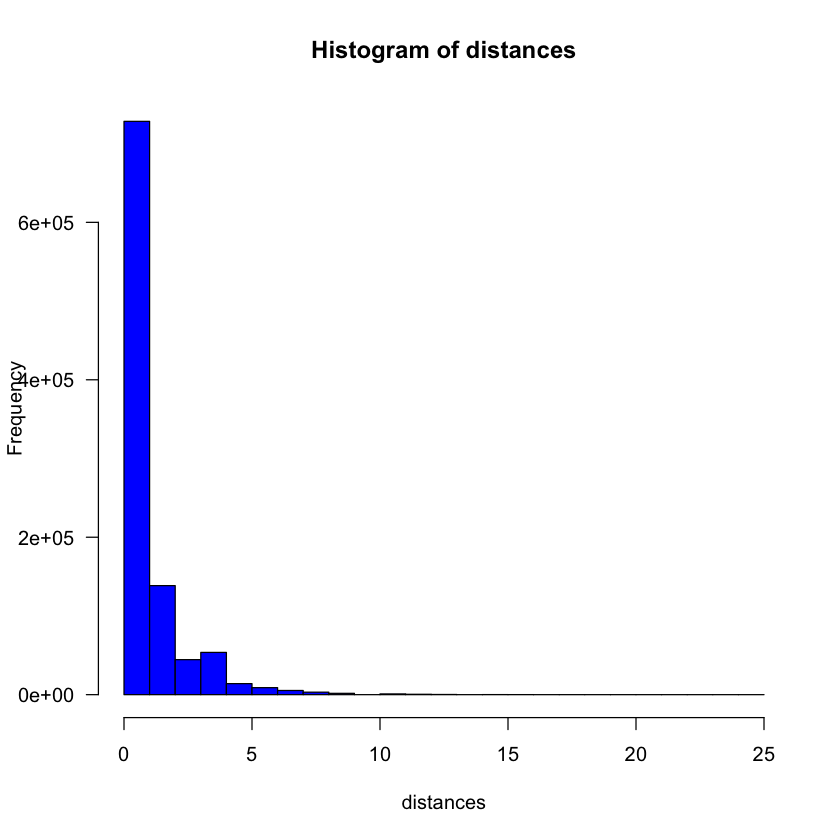

In [89]:
simulate_chi_squared(100, 0.5,  1000000)

So, our chi-squared distribution is a sum of two normal distributions, each squared. Now, if we know this is a normal distribution, and so we know the probability at which a random point can lie inside any particular interval, and the same applies to the second normal distribution, we know much more about the chi-squared distribution than we thought!

**So, the chi-squared distribution with k degrees of freedom is a distribution of the sum of squares of k independent standard normal random variables.**

Here we have several key terms. First, degree of freedom—it’s the number of components (the number of the standard normal random variables). Second, these variables are independent, normal and standard.


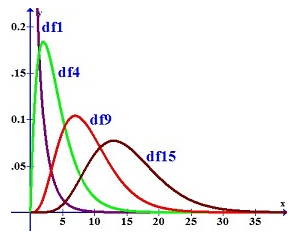

The chi-squared distribution is a sum of squared independent normal random variables. The more independent variables we have, the higher the probability that our distribution will shift rightwards because each distribution contributes a small positive value, and their sum is a larger positive value. Let’s go back to our casino! We had two columns, and we have just discovered that each of them contains a small standard normal distribution which we then square. We can calculate the chi-squared value for each column now. But remember: when we analyze contingency tables or compare the observed frequency distribution with the expected one, the number of degrees of freedom equals the number of columns (levels) minus one.

In [98]:
#Which fraction of all observations is between 2 and 4 for a chi-squared distribution with two degrees of freedom?

x <- pchisq(2, df = 2)
y <- pchisq(4, df = 2)

y-x


[1] 0.2325442

## Contingency Table Analysis

Again, we can speak about relationship of categorical variables; such methods are not limited to numerical variables and methods like regression and correlation. So, here we have a typical example of data with two categorical variables (sex and profession) with two levels each. If we took a look at the raw data, we would see a row for each person containing two variables, the sex and profession with, say, sex coded with 0 for men and 1 for women and profession with 1 for biologists and 0 for programmer. 

The easiest way to represent such data is a 2 by 2 table. So, we could count the number of cases in which we have each combination of the two factors and get this contingency table, which is the most convenient way to summarize such data.

When we make a contingency table, we are interested not in the frequency distribution for a particular variable but in the relationship of two variables. We could formulate the null hypothesis in the following way: the observed frequencies do not differ from the expected ones, or we could say that the two variables are not associated. The alternative hypothesis is that the observed frequency distribution differs from the expected one, or that the variables are associated—and this is meaningful for scientists.

In [151]:
person <- c(1:41)
profession <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0)
sex <- c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)



df <- data.frame(person=person, profession=profession, sex=sex)

table <- table(df[, 2:3])
colnames(table) <- c("Male", "Female")
rownames(table) <- c("Programmer","Biologist")

table


            sex
profession   Male Female
  Programmer   11      6
  Biologist    15      9

But let’s now go step by step. The first step is to calculate the expected value for each of the four cells under the assumption that the null hypothesis is true and two variables are not associated.

Now, if we assume that the null hypothesis is true (let’s speak in the terms of association) and sex does not depend on the profession. How would the table look in this case? This first idea that comes to mind is to take the total number of observations, 41, divide by the number of cells (4) and all the cells with the same value, which is around 10.

Here we have several obstacles. First, we have non-integer values. It’s not a problem. But second, we have a real trouble. If the null hypothesis were true and the two variables are independent, uniform filling of our table isn’t always a good solution. Let’s see why it is so. Let’s say we have an unbalanced number of cases in different classes, say, 30% women and 70% men in our sample, and we have another factor (for example, profession). In this case, which frequencies should we expect if the variables are independent? We should have equal percentages of women among biologists and programmers. So, I think you’ve got the idea: we should fill the table in such a way that the distribution of one factor’s values is the same for each value of the other factor.

Of 41 people in our sample, 26 (63.4 %), are male, and 15 (36.6%), are female. These numbers are obviously not equal. So, if our null hypothesis is that the profession is independent on the sex, then men and women should constitute the same fraction among biologists and programmers. 

Once more: when we calculate the expected frequencies for the each cell, we do not uniformly fill the table but bear in mind that we expect the same distribution of men and women among all professionals. This is what we mean by saying that the person’s sex and profession are independent. Of course, in case we have a balanced sample (50:50 men and women), then we would have a uniform distribution. 




In [152]:
addmargins(table)

,Male,Female,Sum
Programmer,11,6,17
Biologist,15,9,24
Sum,26,15,41


In [153]:
addmargins(prop.table(table))

,Male,Female,Sum
Programmer,0.2682927,0.1463415,0.4146341
Biologist,0.3658537,0.2195122,0.5853659
Sum,0.6341463,0.3658537,1.0000000


But of course, it’s time-consuming to reproduce the calculations we’ve just done each time, so we can use a general formula: for each cell, we multiply the row sum by the column sum and divide the result by the total number of observations. If we calculate the value now, we should get the same result.

Let’s calculate the chi-squared value, which would show how much the observed frequencies differ from the expected ones.

$ \frac {(10.8-11)^2}{10.8} + \frac {(6.2-6)^2}{6.2} + \frac {(15.2-15)^2}{15.2} + \frac {(8.8-9)^2}{8.8} = 0.017$

Now, this statistics is distributed according to the chi-squared distribution but what is the degree of freedom? We have 4 cells but, as well as in the example above, we have to sacrifice one degree of freedom. The idea is just the same: imagine we have the data only for one of the four cells but we also know the total counts of men, women, biologists and programmers.

If we know the total counts, we can fill in the whole table knowing only one cell. Thus, here we have only one degree of freedom since we can use the data for any one cell to restore all remaining values. So, we have only one standard normal variable, and the other values depend on it.

So, now we know the chi-squared value and the corresponding distribution (the chi-squared distribution with one degree of freedom) and can calculate the probability to get a deviation this large or larger.

Some drivers stop when they see a stop sign, others slow down, and some do not pay attention to the sign. Can the type of behavior be gender-dependent? Here you can see the results of an experiment designed to solve this important problem.


In [172]:
Men <- c(20,11,7)
Women <- c(15,12,9)

df   <- data.frame(Men, Women, row.names=c("STOP", "SLOW DOWN", "DON'T SLOW DOWN"))
df
chisq.test(df)

,Men,Women
STOP,20,15
SLOW DOWN,11,12
DON'T SLOW DOWN,7,9



	Pearson's Chi-squared test

data:  df
X-squared = 0.95441, df = 2, p-value = 0.6205


## P-value Calculation


Let’s finally calculate the p-value for our example data. Here are our data and the chi-squared value with Yates’ correction. Please note we use the absolute value of the difference since we only need the value, not the sign. The calculations are fairly simple and can be made with R, for example.

So, what are the results? We got a value of about $10^{-31}$. It’s a very small value. As we remember, the chi-squared distribution for one degree of freedom looks like this, and for such a small chi-squared value the p-value approximately equals 1, meaning that most of the values lie rightwards from this point. Thus, we can accept the null hypothesis that the sex and profession are in this case independent. We could guess this from the data: in each cell, we got very small difference between the observed and expected values.

In [176]:
data <- rbind(c(11, 6), c(15, 9))
chisq.test(data)



	Pearson's Chi-squared test with Yates' continuity correction

data:  data
X-squared = 1.2684e-31, df = 1, p-value = 1


## Pearson’s chi-squared assumptions

Finally, there’s one more important detail worth paying attention to when you use Pearson’s chi-squared test.

- First, all observations have to be independent. It’s not a specific rule for chi-squared but a common rule for most statistical tests.

- Second (and more important), the value in each cell should be above 5. Why is it so? As we’ve already discussed, when we use chi-squared, the deviation of the observed frequency from the expected one divided by the square root of the expected frequency behaves as a standard normal variable. When we have only a few observations, this assumption is violated.

So, now we are almost ready to start applying the chi-squared test, but there is one more thing before we go on. How to interpret the results we get? The final result of the chi-squared test is only one value for all cells. We can reject the null hypothesis but we don’t know a particular cell for which the deviation was the largest.


### Example

In [177]:
patients <- rbind(c(18, 7), c(6, 13))
colnames(patients) <- c("Yes", "No")
rownames(patients) <- c("Placebo", "Aspirin")
chisq.test(patients)


	Pearson's Chi-squared test with Yates' continuity correction

data:  patients
X-squared = 5.5772, df = 1, p-value = 0.0182


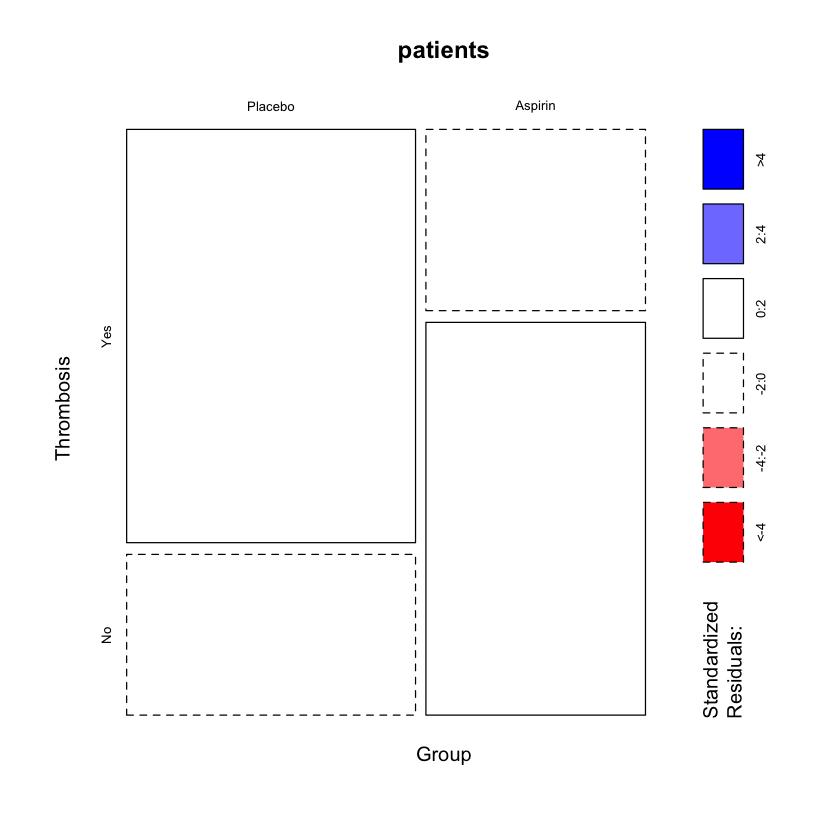

In [179]:
mosaicplot(patients, color=T, shade=T, xlab="Group", ylab="Thrombosis")

So, here are the observed and expected data. For each cell, we could get either less, more or the same value we would expect. This plot shows the deviation in each cell; residuals (the difference between the observed and expected values) are standardized and color-coded. In each case, column width reflects the number of observations for each level, so we can estimate proportion of different outcomes, and for each cell we now have direction of the deviation. In our case, we can see solid-bordered cell for aspirin + no thrombosis, meaning that we have more cases than expected in this group. The cell for aspirin + thrombosis has dashed borders (negative residuals according to the legend), meaning that we have less thrombosis cases in the aspirin group. So, we can say that aspirin works. Importantly, here we can see that the value in each cell deviates from the expected value, absolute values of these deviations were approximately the same, and all these deviations contributed to the chi-squared value we got (about 5.6).

### Example

Let's now consider the familiar dice example. Again, suppose we got the following frequencies for each side:

10, 10, 10, 5, 10, 15.

Test the null hypothesis that the distribution is uniform and type the p-value.

In [197]:
dice <- rbind(c(10, 10, 10, 5, 10, 15))
chisq.test(dice)


	Chi-squared test for given probabilities

data:  dice
X-squared = 5, df = 5, p-value = 0.4159


In [199]:
parties <- rbind(c(10, 30, 50))
chisq.test(parties)


	Chi-squared test for given probabilities

data:  parties
X-squared = 26.667, df = 2, p-value = 1.62e-06


In [201]:
students <- rbind(c(15, 9))
chisq.test(students)


	Chi-squared test for given probabilities

data:  students
X-squared = 1.5, df = 1, p-value = 0.2207


## Fisher's Exact Test

And the last important thing we need to discuss about related analyses. What to do if we cannot apply the chi-squared test because some assumptions about the data are violated? Particularly if we have expected frequencies below 5: as we’ve already discussed, in such cases the chi-squared test is not an adequate choice because the chi-squared statistics doesn’t in fact follow the chi-squared distribution. You might say that the problem of having little data isn’t a problem: just get more data and go on. Unfortunately, it’s not always possible to have a larger sample. For example, let’s say we study a rare disease, one case for million people, or in some cases the experiment may be very expensive, and we have limited funds. Anyway, there’s a special test just for these situations. It’s called **Fisher’s exact test**, and it works even with extremely small samples.

Fisher’s exact test is based on a very simple concept. 

Let’s consider two independent variables (for example, two types of treatment for a very rare disease and a sample of 8 patients). We divided them into two groups, treated with either A or B and recorded whether each of the patients got better or not. So, we have two categorical variables, and each variable has with two levels. 



The first glance on the table makes us think that treatment A works better than treatment B (3 patients got better in the first case while only 1 did so in the second case). Would these data would allow us to reject the null hypothesis that the probability that the patient gets better is equal for both treatments?

The Fisher’s exact test calculates the probability to randomly sample 4 people from treatment A group and 4 people from treatment B group and get exactly the same distribution we see. In other words, it calculates the probability to get exactly the same deviation under the assumption that the null hypothesis is true. However, we want to know the probability to get the same or higher deviation (in our case, higher is 4:0 and 0:4).

Common case:

So, we can calculate the probability of getting deviation this high or higher under the assumption that the null hypothesis is true:

$ p = \frac {(a+b)!(c+d)!(a+c)!(b+d)!}{a!b!c!d!n!}$

As we’ve just seen, Fisher’s exact test solves this problem almost manually, by computing probability for all cases, and that’s why it works well on small tables. So, if you have a task to analyze relationship of two categorical variables but you sample is very small, Fisher’s exact test is a method of choice.

Sometimes it is said that Fisher’s exact test is used for by 2 contingency tables with very small values. In fact, Fisher’s test is not limited to small samples. The only problem is that the bigger the sample, the more many cases of higher deviation to analyze. If we don’t calculate it manually but use modern software, it’s not a problem. It’s appropriate to use Fisher’s exact test even if you could use the chi-squared test. Even more, Fisher’s test can be applied to tables larger than 2x2.

In [205]:
patients <- rbind(c(3,1), c(1,3))
fisher.test(patients)


	Fisher's Exact Test for Count Data

data:  patients
p-value = 0.4857
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
   0.2117329 621.9337505
sample estimates:
odds ratio 
  6.408309 


### Example smart_test (Chisq or Fisher depends on data)

Write a `smart_test` function that receives a dataframe with two nominative variables with an arbitrary number of gradations as input. The function should test the hypothesis that the two variables are independent using a chi-squared test or Fisher's exact test. If at least one cell of the contingency table of two variables has less than 5 observations, the function should calculate Fisher's exact test and return a vector of one element: the resulting p - significance level. If there are enough observations to calculate the chi-square (all cells are greater than or equal to 5 observations), then the function should apply the chi-square test and return a vector of three elements: chi-square value, degrees of freedom, p-significance level.

In [221]:
smart_test <-  function(x){
  x <- table(x)
  if (all(x>5)) {
    chi <- chisq.test(x)
    return (c(chi$statistic, chi$parameter, chi$p.value))
  } else (print(c("P-value for Fisher exact test is :",fisher.test(x)$p.value)))
}

In [211]:
smart_test(mtcars[,c("am", "vs")])

X-squared        df           
0.3475355 1.0000000 0.5555115

In [222]:
smart_test(mtcars[1:20,c("am", "vs")])

[1] "P-value for Fisher exact test is :" "0.628482972136223"                 


[1] "P-value for Fisher exact test is :" "0.628482972136223"

### Example (return most significant variable)
Feel like a bioinformatician! All hereditary information in living organisms is stored inside the DNA molecule. This molecule consists of a sequence of four "letters" - A, T, G and C. Write a function `most_significant` that receives a dataframe with an arbitrary number of variables as input, where each variable is a nucleotide sequence.
For each variable, we can test the null hypothesis that all nucleotides (A, T, G, C) occur with equal probability within that sequence. However, it is possible that in some sequences the frequency distribution of each nucleotide is not uniform. The function should return a vector with the name of the variable (or variables) in which the minimum `p` - significance level was obtained when testing the hypothesis of a uniform distribution of nucleotides using the chi-square test.

In [223]:
most_significant <- function(x) {
    cnames <- colnames(x)
    p_vals <- sapply(x, function(x) chisq.test(table(x))$p.value)      
    return (names(which(p_vals == min(p_vals))))
}


In [224]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_data.csv", stringsAsFactors = F)

In [225]:
most_significant(test_data)

[1] "V3"

### Example (get important cases)

Create a new variable `important_cases` - a factor with two gradations ("No" and "Yes"). The variable should take the value Yes if the values of at least three quantitative variables for this flower are above the average. Otherwise, the important_cases variable will take the value No.

In [228]:
importance_calc <- function(v1, v2, threshold=3){    
    ifelse(sum(v1 > v2) >= threshold, 'Yes', 'No')}    
iris$important_cases <- factor(apply(iris[1:4], 1, importance_calc, v2 = colMeans(iris[, 1:4])))
head(iris, 5)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,important_cases
5.1,3.5,1.4,0.2,setosa,No
4.9,3.0,1.4,0.2,setosa,No
4.7,3.2,1.3,0.2,setosa,No
4.6,3.1,1.5,0.2,setosa,No
5.0,3.6,1.4,0.2,setosa,No


In [230]:
get_important_cases <- function(x){
    importance_calc <- function(v1, v2, threshold=ncol(x)%/%2){
    ifelse(sum(v1 > v2) > threshold, T, F)}    
    x$important_cases <- factor(apply(x[1:ncol(x)], 1, importance_calc, v2 = colMeans(x[,1:ncol(x)])),levels = c(F, T), labels = c('No', 'Yes'))
    return (x)
}

get_important_cases  <- function(d){    
	m <-  colMeans(d)    
	compare_to_means <- apply(d, 1, function(x) as.numeric(x > m))    
	is_important <- apply(compare_to_means, 2, sum) > ncol(d)/2    
	is_important <- factor(is_important, levels = c(FALSE, TRUE), labels = c('No', 'Yes'))    
	d$important_cases <- is_important    
	return(d)
}

### Example mode_function

In R, we can easily calculate the mean and median of a vector, but there is no built-in function for calculating the mode - the most common value - in R! And mode would be so useful to us in the analysis of nominative data! At the same time, the mode function in R exists, but it performs a completely different task (if you want to know which one, check out the help: type ?mode in the console). Write a `stat_mode` function that takes a vector of numbers of arbitrary length as input and returns a numeric vector with the most common value. If there is more than one most frequently occurring value, the function should return multiple mode values as a numeric vector.

In [231]:
stat_mode <- function (v) {
    t_v <- table(v)
    return(as.numeric(names(which(t_v == max(t_v)))))
}


In [232]:
v <- c(1, 2, 3, 3, 3, 4, 5)
stat_mode(v)

v <- c(1, 1, 1, 2, 3, 3, 3)
stat_mode(v)

[1] 3

[1] 1 3

### Example (calculation of standardized residuals)

Dr. Pilyulkin decided to arm himself with statistics to compare the effectiveness of three drugs! Let's help him and write the `max_resid function`, which receives a dataframe with two variables as input: the type of medicine and the result of its use.

Drugs - a factor with three gradations: drug_1, drug_2, drug_3.

Result - a factor with two gradations: positive, negative.

The function should find the cell of the contingency table with the maximum value of the standardized residuals and return a vector of two elements: the name of the row and column of this cell.

You can use the familiar chisq.test() function to calculate standardized residuals. See the help for this function to find where the standardized residuals are stored.

In [233]:
max_resid <- function(x) {
    
    p_vals <- chisq.test(table(x))$stdres
    index <- which(p_vals == max(p_vals), arr.ind = TRUE, useNames = TRUE)
    name <- dimnames(index)[[1]]
    c_name <- colnames(p_vals)[index[2]]
    
    return(c(name, c_name))
}

In [234]:
test_data <- read.csv("https://stepic.org/media/attachments/course/524/test_drugs.csv")
max_resid(test_data)

[1] "drug_1"   "positive"

### Example (frequency histogram)
The main way to visualize the frequency distribution of a nominative variable is a frequency histogram (barplot). Using the ggplot2 library and the built-in diamonds data, plot the frequency distribution of the color variable, on which the cut variable is responsible for the color of the bars. 

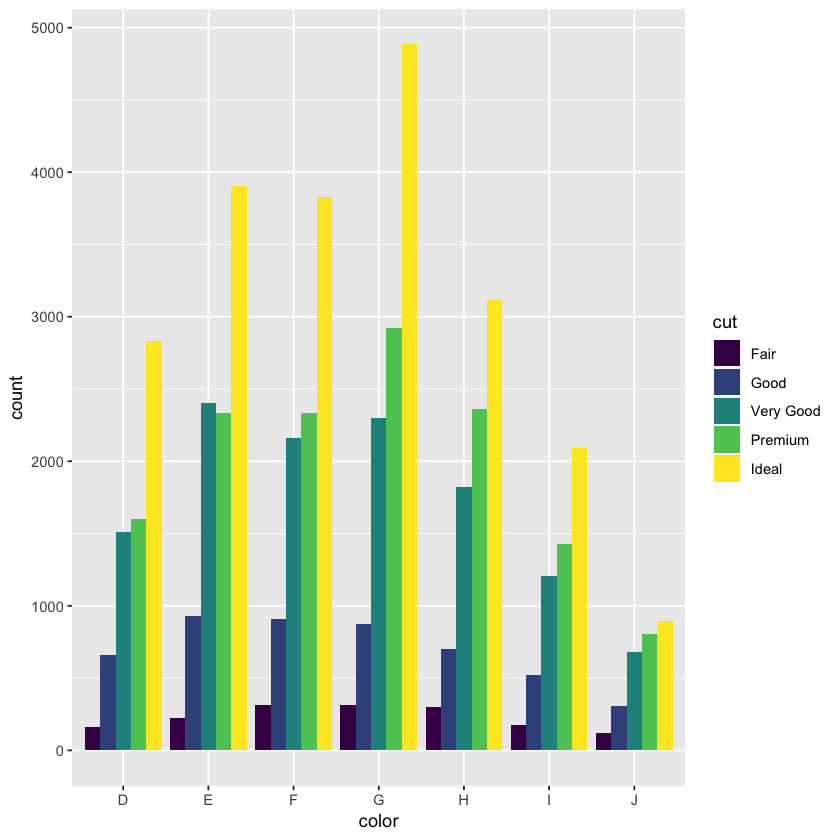

In [235]:
ggplot(diamonds, aes(x=color, fill=cut))+
             geom_bar(position="dodge")


# T- test and Analysis of Variance

## Student's t-Distribution

We have a sample of patients which were treated by a new drug. Sample mean of the curing period is equal to 8. We want to test the hypothesis that the population mean is equals 10. What should we do? To answer this question we have to introduce a new very important concept of **t-distribution.** 

Suppose the null hypothesis is true and population mean is equal to 10 with sigma equal to 4 (μ=10,σ=4). Now we repeatedly form samples of size 10 from the population. And for each sample calculate the familiar criteria. Normalized deviation from the population mean. However, instead of population standard deviation we have used sample variance. For comparison we can also simulate sample distribution using population variance:

$$ z = \frac {\bar{X} - \mu}{\frac {\sigma}{\sqrt{n}}} $$

$$ t = \frac {\bar{X} - \mu}{\frac {sd}{\sqrt{n}}} $$

The plot below shows the distributions of 10000 samples:



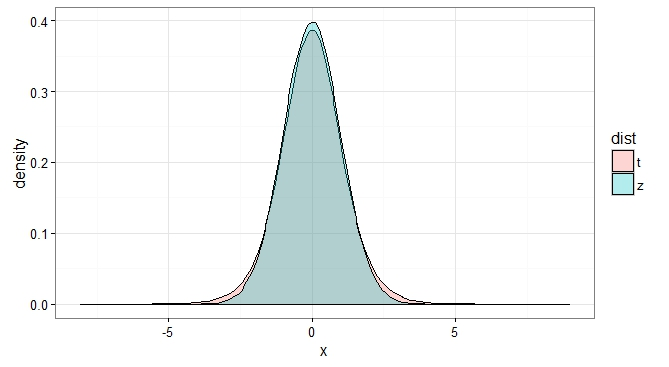

So we can see the sampling distributions differ. It’s obvious that distribution with sample variance is wider. In other words chances to observe greater deviations from the mean is higher in the sampling distribution where sample variance was used. The explanation of that fact is pretty simple actually now for each observation we have two random parameters: sample mean and sample variance. Both parameters now are sources of sampling distribution variance. In other words it’s possible that both sample statistics deviated noticeably from the parameters. And as a result the corresponding data point might fall further from the center of the distribution.

But consider for a moment what happens if we increase the sample size.  For instance we can use samples of 20 observations. We can see that the shape of distributions has became more similar with a normal one. 

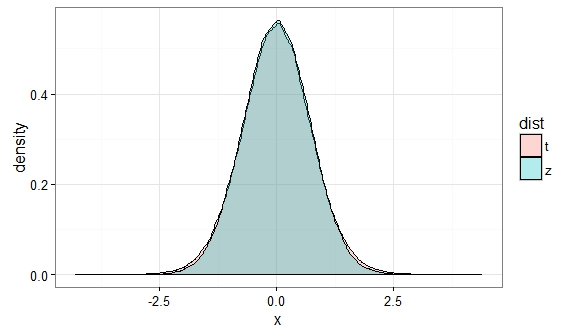

And if we increase sample site to 30 observations we will observe approximately the same distribution.

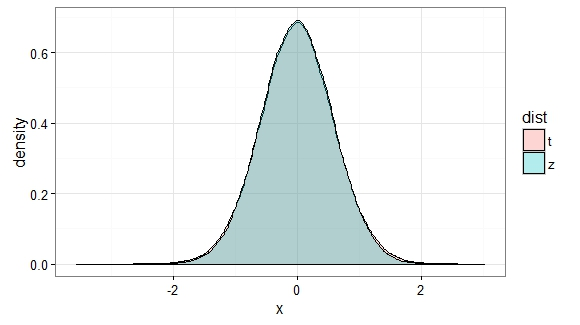

Now let's summarize these facts. If we don’t know the standard deviation in the population, the best option that we have is to use sample standard deviation to estimate standard error. As a result the distribution of the statistics 
$ \frac {\bar{X} - \mu}{\frac {sd}{\sqrt{n}}} $ is called **t-distribution.**

The t-distribution is a distribution of deviations of sample mean from the population mean divided by se equal to $ \frac {sd}{\sqrt{n}}$

T-distribution is very similar to the normal distribution; however, its shape depends on sample size. And as a result, the possibility to observe such or more extreme deviation depends on sample size as well.

To describe this properties of t-distribution we say that the t-distribution has a parameter called degree of freedom. It equals sample size minus one (n−1). As in case of normal distribution we can calculate the probability of such or more extreme deviations but now this probability depends on degree of freedom of the distribution. Then higher sample size and as a result degree of freedom, the more sampling distribution is similar to the normal distribution.  

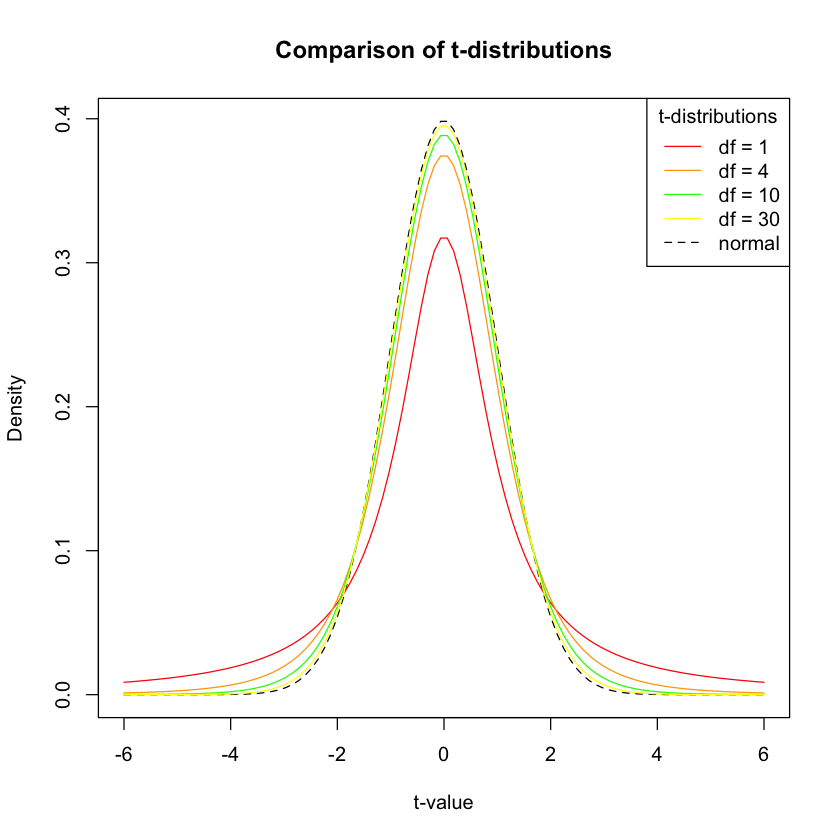

In [270]:
# Generate a vector of 100 values between -6 and 6
x <- seq(-6, 6, length = 100)
  
# Degrees of freedom
df = c(1,4,10,30)
colour = c("red", "orange", "green", "yellow","black")
  
# Plot a normal distribution
plot(x, dnorm(x), type = "l", lty = 2, xlab = "t-value", ylab = "Density", 
     main = "Comparison of t-distributions", col = "black")
  
# Add the t-distributions to the plot
for (i in 1:4){
  lines(x, dt(x, df[i]), col = colour[i])
}
  
# Add a legend
legend("topright", c("df = 1", "df = 4", "df = 10", "df = 30", "normal"), 
       col = colour, title = "t-distributions", lty = c(1,1,1,1,2))


### Examle

Let’s test our hypothesis using the t-distribution. Consider the following task. Suppose we have a sample of 25 patients, we want to test a null hypothesis that the average period of curing is equal to 10 days (the average period of curing of the old drug version). However, sample mean equals 8 with sd equal to 4.1.

In [280]:
mean <- 10
s_mean <- 8
sd <- 4.1
n <- 25

q <- (abs(mean-s_mean))/(sd/(sqrt(n)))

#calculating p_value
2*pt(q = q, df = (n-1), lower.tail = F)

[1] 0.02249638

In [281]:
#Suppose you have a sample of 15 observations and test the null hypothesis that the mean value equals 10 with one-
#sample t-test. You got the t-value of 2. Calculate the (two-sided) p-value.

n <- 15
q <- 2
#calculating p_value
2*pt(q = q, df = (n-1), lower.tail = F)

[1] 0.06528795

## Student's t-Test

So, we have already introduced all the concepts to go further to a real statistical hypothesis. If truth be told, the last example with t-distribution was still a bit artificial. We tested the hypothesis that a new drug was better compared to the old one. And we assumed that the population mean of the old drug was equal to 10. So a more realistic situation would be the following. We want to compare the efficiency of two drugs, an old and a new one. To test this hypothesis we form two samples of patients. The first sample was treated by the old drug. And the second sample was treated by the new drug. Using these sample data we want to test the hypothesis that population means of curing period for these two drugs differ. This is finally a perfectly real example of applied data analysis. Let’s consider how we can test this hypothesis using **Student’s t-test.**

First, we have to formulate statistical hypotheses. The null hypothesis claims that there is no difference in the general population mean curing periods for the two drugs. In contrast, the alternative hypothesis states that populations mean are not equal. Which hypothesis should we accept according to our data? Now we are going to calculate p-value and make a statistical decision.

The main idea remains the same. Assume that the null hypothesis is true then imagine that we repeat the experiment countless times. But now we have two samples. Is it possible to calculate only one statistics to describe the extent of deviation sample data from the null hypothesis prediction?

If the null hypothesis is true then the difference between populations mean is equal to zero. And any difference between sample means is accidental. Great, then we can use difference of the means as the main variable $ \bar{X}_{new} - \bar{X}_{old}$

 Let’s simulate the distribution of means difference in case of null hypothesis is true. We can see that this distribution is approximately normal with mean is equal to zero. 

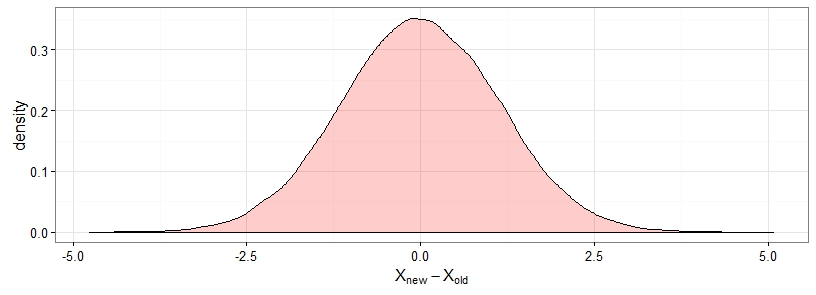

That's absolutely logical because the null hypothesis predicts absolutely no difference between population mean. However our sample result deviates from the mean of the distribution. The main question now is how valuable  this deviation in term of the standard error of that distribution.

Well now we have to understand how to compute se of that distribution. The distribution describes the difference between two sample means. Can we say something about the distribution of each sample mean? We can indeed. We have already discussed it. Well we know that se of sampling distribution of each sample mean can be calculated using sample standard deviation: $ \frac {sd}{\sqrt{n}}$

Now if we consider the distribution of sample means difference then the variation of this distribution depends both from the first and the second sample mean variation as well, and the se is equal to: 
 $ SE = \sqrt {\frac {sd_1^2}{n_1} + \frac {sd_2^2}{n_2}}$
 
We can see that se of each sample mean distribution contributes to the variability of the mean difference distribution.

Now let’s try to simulate the distribution of sample mean difference divided by the corresponding standard error. We can see that this distribution seems like normal but it’s easy to demonstrate that its shape depends on the sample size in both samples. And to describe this distribution we use the t-distribution. Well, but what’s about degrees of freedom? The idea is familiar: if the degree of freedom for the one-sample mean distribution is equal to sample size minus one. Then for the distribution of sample means difference we should add the degree of freedom of each mean. Then the final formula is 

$ df = n_1 + n_2 -2 $

So let’s summarize the result. To test the hypothesis about equality of population means we simulate the distribution of deviations sample means difference from assumed means difference in population. The standard deviation of this distribution or standard error combines standard errors of each sample mean distribution. So now we are able to calculate how far the sample difference deviates from zero in unit of se. 

### Example

In [283]:
X_new <- 8
sd_new <- 4.1
n_new <- 25

X_old <- 12
sd_old <- 3.8
n_old <- 25

q <- abs(X_new-X_old)/(sqrt(sd_new**2/n_new + sd_old**2/n_old))
q

#calculating p_value
2*pt(q = q, df = (n_new+n_old-2), lower.tail = F)

[1] 3.577709

[1] 0.000804243

In [391]:
X_new <- 45
sd_new <- 9
n_new <- 100

X_old <- 34
sd_old <- 10
n_old <- 100

q <- abs(X_new-X_old)/(sqrt(sd_new**2/n_new + sd_old**2/n_old))
q

#calculating p_value
1-pt(q = q, df = (n_new+n_old-2), lower.tail = F)




[1] 8.176236

[1] 1.731948e-14

In [377]:
type1 = c(84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5)
type2 = c(57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5)

df <- cbind(type1, type2)

vals <- data.frame(t(apply(df, 2, function(x) c("mean" = mean(x), "sd"= sd(x), "count" = length(x), "se" = sd(x)/sqrt(length(x))))))               

t <- (vals[1,1] - vals[2,1]) / (sqrt(vals[1,2]**2/vals[1,3] + vals[2,2]**2/vals[2,3]))
t
                
#calculating p_value                
2*(1 - pt(q = t, df =(vals[1,3]+vals[2,3]-2), lower.tail = T))

a = 0.95

coefficient <- qt((a + 1) / 2, df = (vals[1,3]+vals[2,3]-2))           
                
vals$left_interval <-  c(type1=(vals[1,1] - coefficient * vals[1,4]),type2=(vals[2,1] - coefficient * vals[2,4]))          
vals$right_interval <- c(type1=(vals[1,1] + coefficient * vals[1,4]),type2=(vals[2,1] + coefficient * vals[2,4])) 
                           
vals

[1] 6.04782

[1] 4.894703e-07

,mean,sd,count,se,left_interval,right_interval
type1,100.815,10.2465,20,2.291188,96.17673,105.45327
type2,75.735,15.4581,20,3.456537,68.73761,82.73239


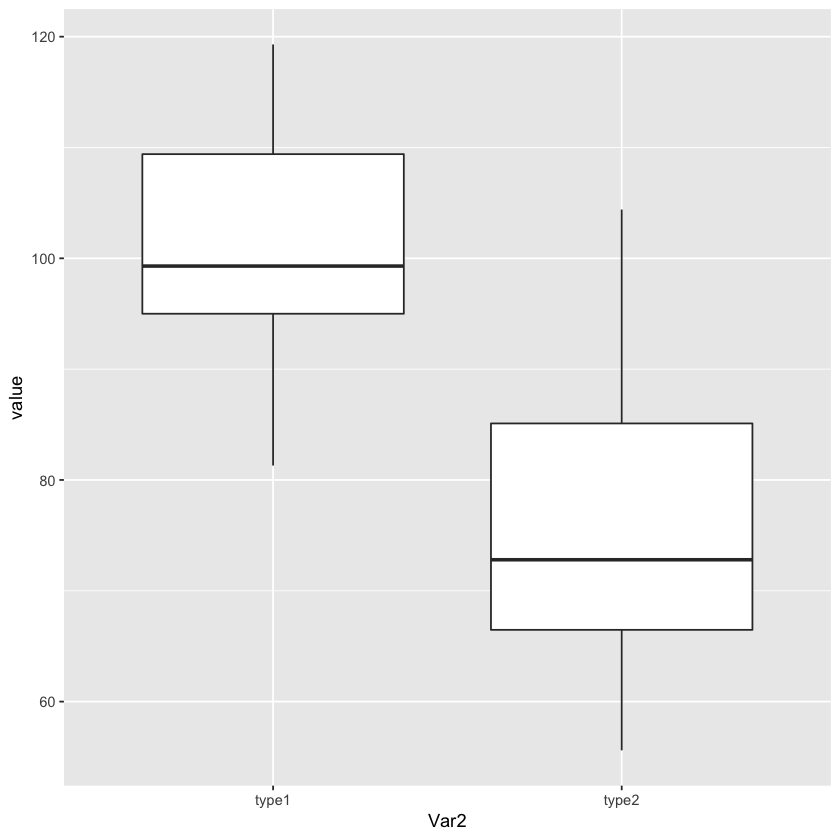

In [383]:
#library(reshape)
data_long <- melt(df)                                   
ggplot(data_long, aes(x=Var2, y=value)) +
  geom_boxplot()
  


In [385]:
a = 0.95
mean <- 89.9
sd <- 11.3
n <- 20

se <- coefficient*(sd/sqrt(n))  
coefficient <- qt((a + 1) / 2, df = n-1)           
                
left_interval <- mean - se  
right_interval <- mean + se    
                           
left_interval; right_interval

[1] 84.61144

[1] 95.18856

However, the most common way to demonstrate the difference between two samples is to use confidence intervals.

Remember, we’ve already calculated CI using z-value. Let’s consider how to calculate ci with t-distribution. The main idea is the same. Suppose we repeatedly form samples from the population. And for each sample we calculate a confidence interval. However now we use t-value instead of z. If the sample size is equal to 25, then the corresponding t-value for a 95 % confidence level is approximately equal to 2.06. 

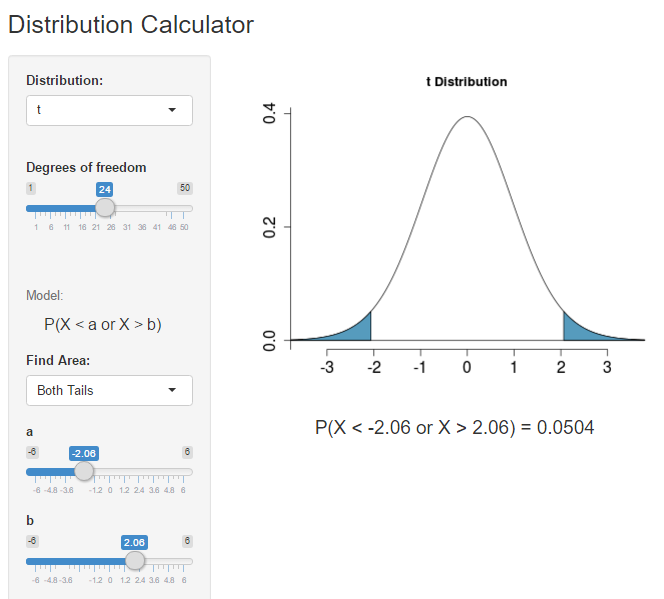

[Link for calculator](https://gallery.shinyapps.io/dist_calc/)

## QQPlot

In Statistics, Q-Q(quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other. If the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.

Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. You can tell the type of distribution using the power of the Q-Q plot just by looking at the plot. In general, we are talking about Normal distributions only because we have a very beautiful concept of 68–95–99.7 rule which perfectly fits into the normal distribution So we know how much of the data lies in the range of first standard deviation, second standard deviation and third standard deviation from the mean. So knowing if a distribution is Normal opens up new doors for us to experiment with the data easily. Secondly, Normal Distributions occur very frequently in most of the natural events which have a vast scope.

We plot the theoretical quantiles or basically known as the standard normal variate (a normal distribution with mean=0 and standard deviation=1)on the x-axis and the ordered values for the random variable which we want to find whether it is Gaussian distributed or not, on the y-axis. Which gives a very beautiful and a smooth straight line like structure from each point plotted on the graph.

Now we have to focus on the ends of the straight line. If the points at the ends of the curve formed from the points are not falling on a straight line but indeed are scattered significantly from the positions then we cannot conclude a relationship between the x and y axes which clearly signifies that our ordered values which we wanted to calculate are not Normally distributed.

If all the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot.



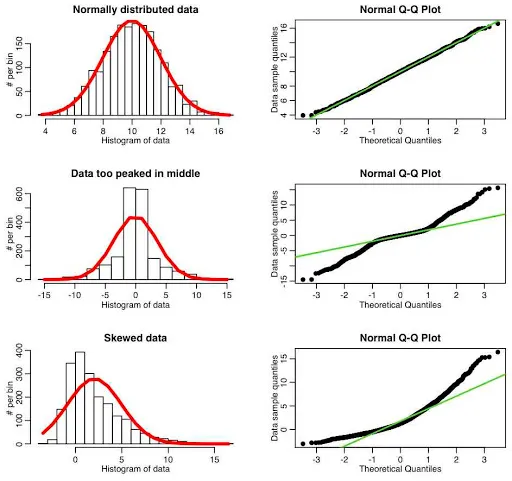

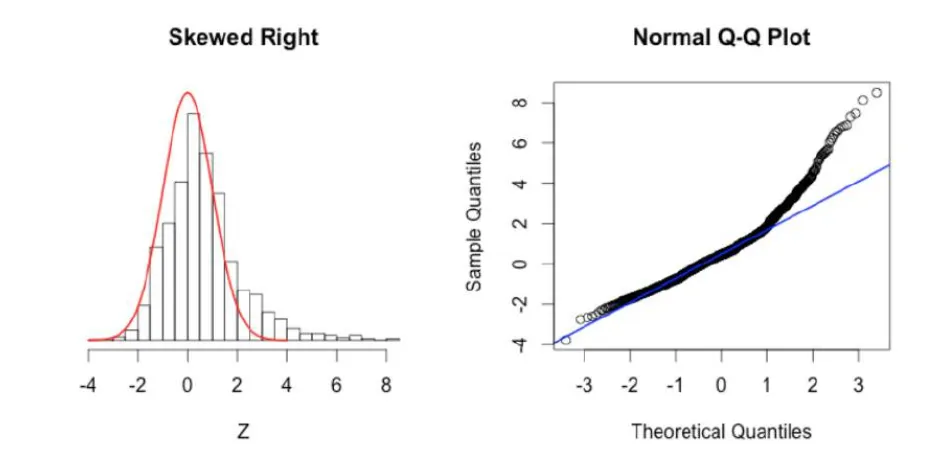

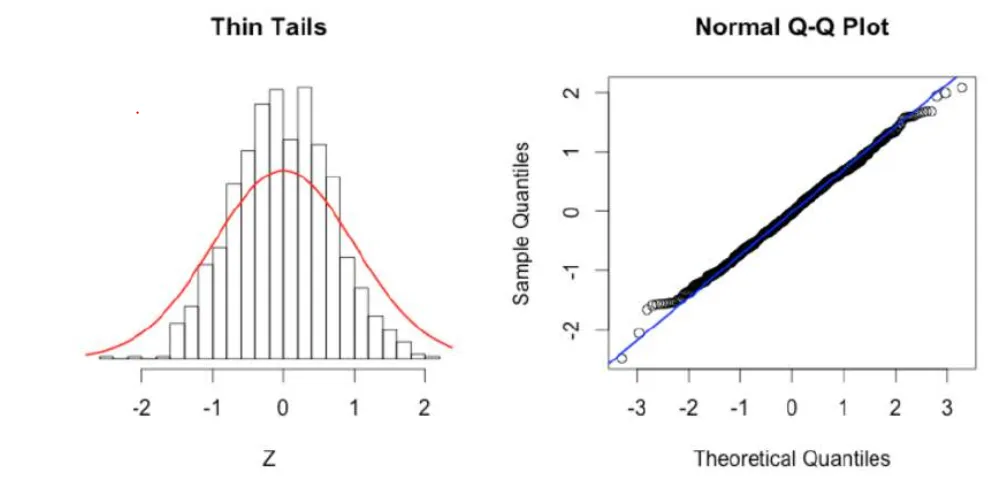

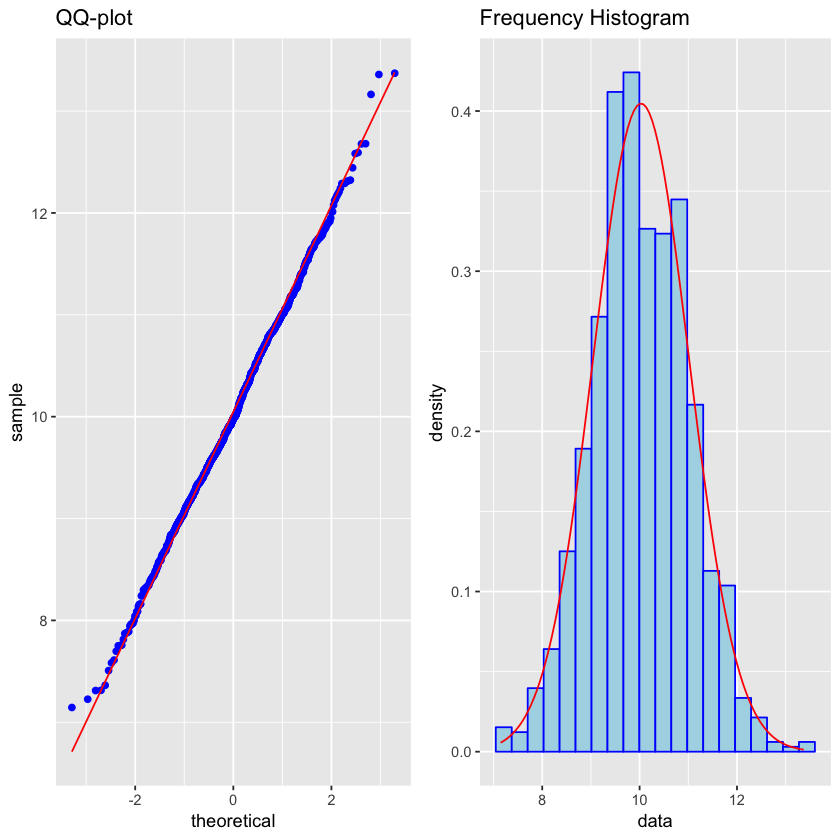

In [399]:
library(tidyverse)
library(gridExtra)

df <- tibble(data = rnorm(1000, 10, 1))
qq_plot <- df %>% 
  ggplot(aes(sample = data)) +
  stat_qq(color="blue") +
  stat_qq_line(color="red") +
  labs(title = "QQ-plot")

hist_plot <- df %>% 
  ggplot(aes(x = data)) +
  geom_histogram(aes(y = ..density..), bins = 20, color="blue", fill="lightblue")+
  stat_function(fun = dnorm, args = list(mean = mean(df$data), sd = sd(df$data)), color="red") +
  labs(title = "Frequency Histogram")

grid.arrange(qq_plot, hist_plot, ncol=2)

## Mann - Whitney test

Mann-Whitney U test is a non-parametric test which is alternative to the parametric two sample t-test. It is first proposed by Frank Wilcoxon (1945) and later worked by Henry Mann and Donald Whitney (1947). Hence, the Mann-Whitney U test is also known as Wilcoxon rank sum test or Wilcoxon‐Mann‐Whitney (WMW) test.

Mann-Whitney U test used for comparing differences between two independent groups. It tests the hypothesis that if the two groups come from same population or have the same medians. It does not assume any specific distribution (such as normal distribution of samples) for calculating test statistics and p values. If there are more than two groups to analyze, you should consider Kruskal-Wallis test.

The sample mean ranks or medians (not means) are compared in the Mann-Whitney U test based on the shape of distribution of two independent groups, which distinguishes it from the t-test, which compares sample means.

Mann-Whitney U test can be applied on small (5-20) and large samples (n > 20). The power increases with sample size.
Though Mann-Whitney U test and t-test has similar statistical power, it is always wise to use t-test if its assumptions are met.

We can also state the two-sided hypothesis in terms of median as (when two groups have same shape of distribution)

*Null hypothesis:* Two groups have equal median

*Alternative hypothesis:* Two groups does not have equal median

One-sided alternative hypothesis tests median from one group can be greater or lesser than other group.


In [401]:
wilcox.test(mpg ~ am, data=mtcars)

Warning message in wilcox.test.default(x = c(21.4, 18.7, 18.1, 14.3, 24.4, 22.8, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  mpg by am
W = 42, p-value = 0.001871
alternative hypothesis: true location shift is not equal to 0


## One-Way ANOVA

We have introduced Student’s t-test distribution to compare two sample means. This is a very commonly used test in statistics; however, it has one great disadvantage. Using t-test we can compare only two samples. Suppose we have invented three versions of new drug now. And you want to compare their efficiency with an older version of the drug and between each other. 

In other words, you want to test the null hypothesis that all the means are equal. So the first thing that comes to mind is just to compare each sample one to one using t-test. Indeed, suppose we performed such comparison and found out that there is one pair that had p-value equal to 0.04. Well it can actually be considered as an evidence in favor of the new drug version. Moreover, we decided to publish that finding but our paper got rejected because of statistical analysis problems.

﻿What did we do wrong? Well, we have made a very common mistake. Let’s consider the nature of that mistake. When we test a statistical hypotheses we set alpha level which can be described in terms of stringency of the test. Remember we claim that null hypothesis is true then we can calculate the p-value. The p-value is the probability to observe given or more extreme deviation if the null hypothesis is true. In other words, if we set alpha to be equal 0.05 we are ready to risk. When we set alpha equal to 0.05 and rejected the null  hypothesis in a given test it means that we could observe such or more extreme deviations less than in 5 percents of trials. And this threshold is considered as sufficient to reject null hypothesis. In other words, if the null hypothesis is true, we will observe given or more extreme deviation less than in 5 percents of trials.
 
We would consider the difference as significant if the p - value is lower than 0.05 in any pair, the usual procedure. Now let’s count how many times we will observe at least one pair of sample means with a significant difference (p < .05). Let’s start the simulation and we can see that approximately in n percents of all the trials we observe at least one significant result. 

Well, the situation is pretty absurd. We set the alpha to be equal to 0.05 but instead we got 26.46 percents of significant trials. And that’s a problem. Moreover, if we increase the number of samples to 30, then the probability to get at least one sample with a significant difference is approximately equal to 1. As a result we would reject the null hypothesis almost always and we would make the first type error too often.    

Well whatever hypothesis you want to prove just form thirty samples and you will observe at least one sample pair with p-value smaller than 0.05 almost sure. Well we must control for the first type error when we have several groups to compare. A special method called ANalysis Of VAriance (ANOVA) was developed by Ronald Fisher. Let’s apply ANOVA step by step.

We will use a small dataset to do all the computations by hand. Suppose we have three samples of three observations each. We want to test the null hypothesis that the population means are equal across the groups using this sample data. 



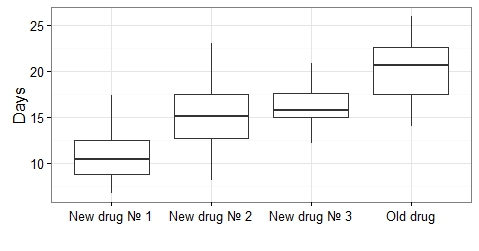

In [309]:
sample1 <- c(4,5,6)
sample2 <- c(6,7,8)
sample3 <- c(8,9,10)

df<- cbind(sample1, sample2, sample3)
df


sample1,sample2,sample3
4,6,8
5,7,9
6,8,10


Now let’s formulate the alternative hypothesis. Well the alternative hypothesis claims that at least two means are not equal. In other words a lot of scenarios can cause acception of the alternative hypothesis in case of ANOVA. For instance only one pair of means differs or all the means are different.

 

The main idea of ANOVA is pretty simple. Suppose we form three samples and combine all the observations:



In [293]:
all_samples <- c(sample1, sample2, sample3)
all_samples


[1]  4  5  6  6  7  8  8  9 10

Well we can see that not all the data points are equal and the distribution of all observations has some variability. This variability has two main sources. First of all suppose that the null hypothesis is true and all the population means are equal, even then if we form three sample we will observe some variation across all the data points just due to random variability of the data in population.

Now let’s imagine the alternative hypothesis is true and all the population means differ. Then if we form three samples, combine all the observations we will notice that the variation of all the data points became higher. And it’s pretty logical; then greater the difference between the sample means then higher would the variation of combined data points. Because the distance between the observations from different sample is noticeable. Well, the main idea that our data can way because of two sources. The first source of the variability is a random variation of data this variation is also called unexplained variation. And the second source is the difference between the group. The main goal of ANOVA is to understand what source of variation makes a greater contribution in the data variability. That’s why we called this analysis as analysis of variance or dispersion analysis. And if a noticeable part of variability in data caused by differences across groups then we will reject null hypothesis.   

Well, the main steps in hypothesis testing remain the same. First step we assume that the null hypothesis is true then we simulate distribution of parameter (we will know what kind of parameter is soon). Then we calculate the probability to observe given or more extreme deviation. The main goal of ANOVA is to compare the two sources of variability in the data. Then there should be a statistic to indicate which source of variation makes a greater contribution. Let’s introduce some basic concepts of ANOVA.

First of all we can calculate the **Total sum of squares.** For that purpose we have to combine all the data points to one groups and find sum of squared deviations from the mean for each observation. 

Well let’s calculate the mean and then for each observation we can find squared deviation from the mean. Now just add together all the deviations to calculate the **Total Sum Of Squared (SST).**


In [294]:
mean_all <- mean(all_samples)
mean_all

[1] 7

In [296]:
SST <- sum((all_samples-mean_all)**2)

SST

[1] 30

The first source is the **Within groups sum of squares (SSW).** This measure represents the random unexplained variation in data. To find SSW we have to calculate calculate sum of squared deviations from the sample mean in each sample. Let’s calculate that deviations in the first sample, then for the second sample and the at last in the third sample. If we add all this squared deviations we will get SSW.  SSW represent the random variability of the data. We know nothing about why the observations differ across the groups.


In [297]:
X1 <- sum(sample1)/length(sample1)
X2 <- sum(sample2)/length(sample2)
X3 <- sum(sample3)/length(sample3)

X1; X2; X3

[1] 5

[1] 7

[1] 9

In [298]:
SSW <-  sum((sample1-X1)**2 + (sample2-X2)**2 + (sample3-X3)**2)

SSW

[1] 6

Now go to the second source of **SST.** The Between groups sum of squares represents the explained part of SST. SSB shows how much group means differ from each other. To calculate SSB we have to find squared deviations of each sample mean from the mean of all the observations. Than greater the difference between sample mean then higher sum of  squares. 

In [300]:
SSB <- length(sample1)*(X1-mean_all)**2 + length(sample2)*(X2-mean_all)**2 + length(sample3)*(X3-mean_all)**2

SSB

[1] 24

Well now  we can see that all the variation in the data SST is equal to sum of SSW and SSB, and what’s is more important for SSB is noticeably greater than SSW. In other words it seems that the main source of the variability in the data is a result of differences between the groups. This is a strong point in favor of alternative hypothesis. But now it’s still an empirical observation. Well we have to calculate the p-value to make a statistical decision.

Well, now we have to choose a statistics which reflects the ratio of SSW and SSB. First, let’s average the sums of squares. I hope you have already noticed that all the sums of squares are the same as the denominator in variance formula. To average SSW let’s divide the sum of squared deviations in the first sample by sample size and do the same with the other samples. However, to calculate the average squared deviations we use sample data, and we have to subtract constant from the sample size. Add this correction to each sample and now we can simplify the formula.

$$ MS_{bg} = \frac {SSB}{m-1}$$

Notice that the denominator is equal to the difference of all the observations and number of groups. The SSW divided by N-m (N is total numbers of observations, m is numbers of groups) is called mean square within groups and denoted by the symbols MS with a lower index wg. Now find an averaged SSB. Well just divide it by the number of groups minus one. The average SSB (mean square between groups) is denoted MS with a lower index bg.

$$ MS_{wg} = \frac {SSW}{N-m}$$

Now we are ready to introduced the F-criterion. The F-criterion is equal to the ratio of mean square between groups and mean square within groups. 

$$ F = \frac {MS_{bg}}{MS_{wg}}$$

$ df_{bg} = {m-1}$

$ df_{wg} = {N-m}$

Where m - is the number of groups, N- total number of observations in all groups

In [308]:
MS_bg <- SSB/(3-1)

MS_wg <- SSW/(length(sample1)*3 -3)

F <- MS_bg/MS_wg

MS_bg; MS_wg; F

[1] 12

[1] 1

[1] 12

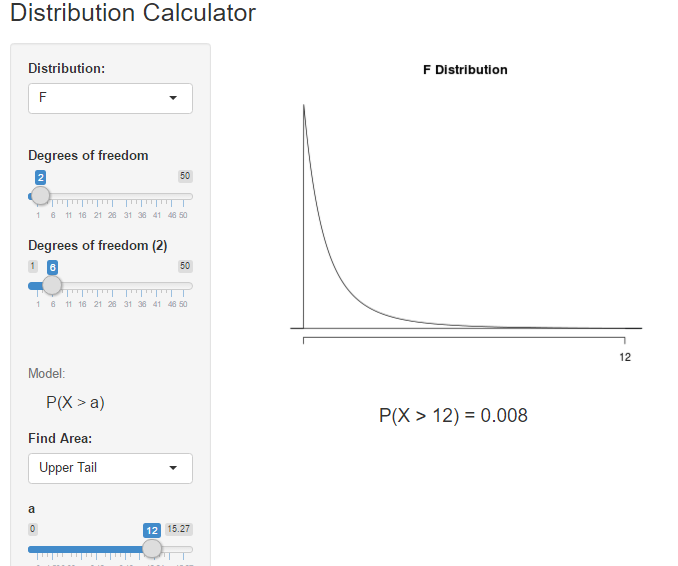

Set the corresponding values and we can see that p-value is equal to 0.008. In other words, if the null hypothesis is true and all the population means are equal, then the probability to observe given or greater F -﻿ statistics is equal to 0.008. If the alpha level is equal to 0.05 we can reject the null hypothesis and accept the alternative one. ﻿﻿However how can we interpret the result. This is a tricky moment because we only know that at least one pair of means differ significantly. 

In [60]:
df <- read.csv("https://stepik.org/media/attachments/lesson/8083/genetherapy.csv")

gr_df <- df %>%
   group_by(Therapy) %>%
   summarise( N = n(),
              Mx = mean(expr),
              SD = sd(expr),
              y_max=Mx+1.96*sd(expr)/sqrt(N),
              y_min=Mx-1.96*sd(expr)/sqrt(N))
gr_df

da <- aov(expr~Therapy, data=df)
da

summary(da)

Therapy,N,Mx,SD,y_max,y_min
A,15,99.73333,4.165619,101.84143,97.62524
B,15,98.80000,5.894307,101.78293,95.81707
C,15,94.40000,5.193402,97.02822,91.77178
D,15,92.33333,3.735289,94.22365,90.44302


Call:
   aov(formula = expr ~ Therapy, data = df)

Terms:
                  Therapy Residuals
Sum of Squares   560.7167 1302.2667
Deg. of Freedom         3        56

Residual standard error: 4.822319
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value   Pr(>F)    
Therapy      3  560.7  186.91   8.037 0.000152 ***
Residuals   56 1302.3   23.25                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

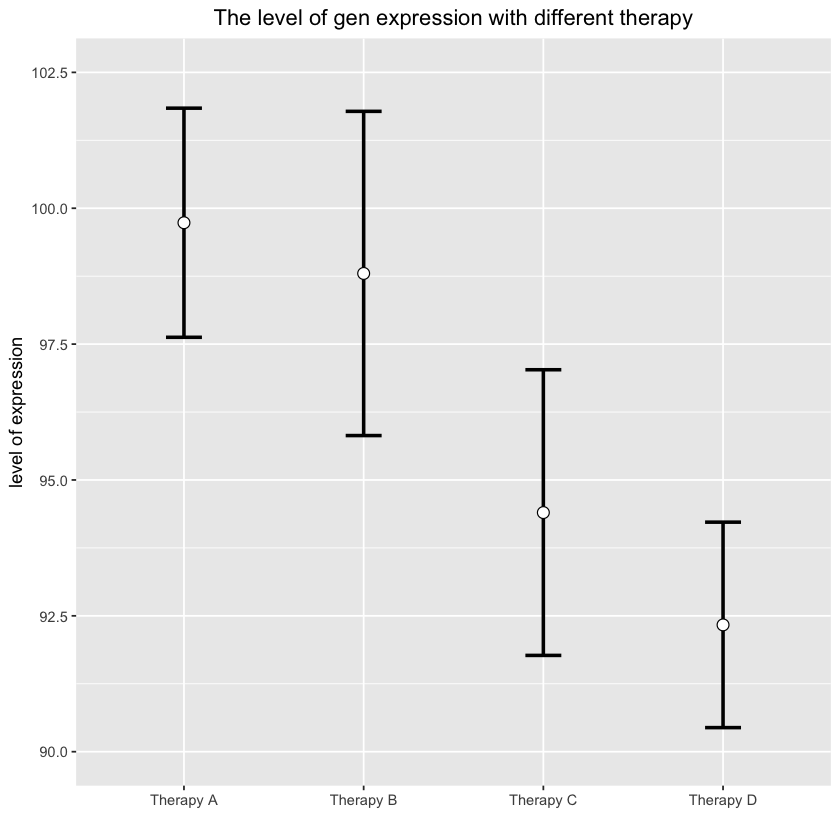

In [48]:
ggplot(gr_df, aes(factor(Therapy), Mx))+
             geom_errorbar(aes(ymin=y_min, ymax=y_max), width=0.2, lwd=1)+
             geom_point(shape=21, size=3, fill='white')+
             ggtitle("The level of gen expression with different therapy")+
             xlab("")+
             scale_y_continuous(name='level of expression',
                                limits = c(90, 102.5), breaks = seq(90,102.5,2.5))+
             scale_x_discrete(labels=c('Therapy A', 'Therapy B', 'Therapy C', 'Therapy D'))+
             theme(plot.title = element_text(hjust=0.5))

## Post Hoc Analysis

Well, let’s go back to the problem of multiple comparisons. We have already known that comparing all the pairs using t-test raises some problems. The main problem of this approach is that even if we use alpha equal to 0.05 in each comparison the possibility to observe at least one pair of means that has p smaller than 0.05 is increasing proportionally to number of comparison.

Well, then we have to manage the increasing of type I error probability. One of the most common approach was suggested by Italian mathematician Carlo Emilio Bonferroni. He studied the relationship between number of comparisons and the possibility of type I error. Bonferroni showed that if we are going to realize n comparisons and still want the type I error to be equal to alpha, we have to divide alpha by the number of comparisons.

In other words if we are going to realize 6 pairwise comparisons and we want to guarantee that the probability to observe at least one pair of means that differs significantly is approximately equal to 0.05 we have to use 0.05 / 8 = 0.00625 in each pair as a new alpha level. And we will reject the null hypothesis only if p-value is smaller than new alpha that is 0.00625.

Let’s simulate this approach using the familiar framework. Suppose the null hypothesis is true and we are going to repeatedly form n samples and make m pairwise comparisons. Remember when we used alpha equal to 0.05 to compare each pair we observed approximately 26 percentages of cases where at least one pair gave a significant result. In that situation we would reject null hypothesis too often. Now we are going to use alpha equal to 0.05 divided by number of comparisons. 

Let’s use Bonferroni correction to compare our samples. We have to perform 6 pairwise comparisons. 



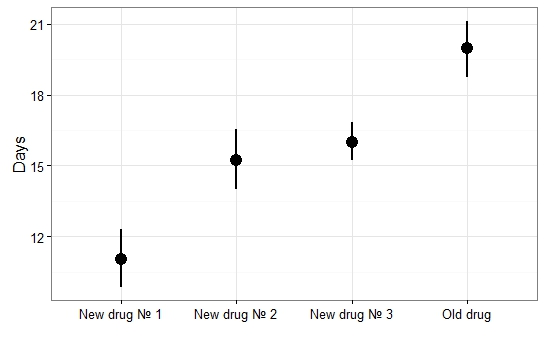

As a result we would consider the difference between two sample means as significant only if the p-value is lower than 0.05 / 6. Then we can apply t-test for all the pairs and compare the p-value to the new alpha. Now we are ready to make a statistical decision. We claim that the are significant differences in all the pairs where p-value lower than alpha.

Post hoc comparisons using the t - test with Bonferroni correction indicated that the mean score for the new drug number one (X¯=11.2, sd=2.5) was significantly different than the old drug (X¯=19.6, sd=3.4).  

Well, the Bonferroni correction does manage the problem with the probability of error I type. However, this correction has a great disadvantage and it’s not very common way to perform pairwise comparisons in statistics nowadays. The main problem with Bonferroni correction is excessive conservatism of this approach.

We have already noticed that to reject null hypothesis in previous example we used alpha equal 0.00625. Imagine that we have 30 groups then Bonferroni correction would suggest us use alpha equal to 0.001. I hope you understand the problem now. To prevent type I error we will accept null hypothesis too often. As a result it’s easy to demonstrate that to hold type I error on the 0,05 level we would miss approximately 0,8 percentages of real discoveries. 

To manage this problem a lot of more liberal correction have been proposed. Let’s consider one of them called **Tukey HSD test.** Tukey HSD test (or Honest Significant Difference test) is a modification of t-test that has been proposed by American mathematician John Tukey. The main idea of this test is to take into account MS within groups value computing standard error.

In [54]:


false_alarm <- function(m, n, a) {
  # Creating empty Data Frame with n rows (number of observations) and m columns (number of samples)
  d <- data.frame(matrix(0, n, m))
  # Creating matrix with all possible combinations for our future t_test
  s <- combn(1:m, 2)
  # Creating vector length 1000 for future extracting samples
  x <- vector("numeric", 1000)
  
  # Creating functionfor t.test returning only p_value
  t_test_pval <- function(x, y) {
    se <- sqrt((var(x) + var(y))/n)
    t_stat <- (mean(x) - mean(y))/se
    df <- n + n - 2
    pval <- 2*pt(abs(t_stat), df, lower.tail = F)
    pval
  }
  
 for (q in 1:1000) {
    d <- data.frame(apply(d, 2, function(i) rnorm(n)))
    # Filling our data frame with random numbers
    for (i in 1:ncol(s)) {
      TEST <- t_test_pval(d[, s[1, i]], d[, s[2, i]])
      if(TEST < a) x[q] <- 1
      if(TEST < a) break
    }
  }
 x <- as.data.frame(table(x))
  barplot(x$Freq, names.arg = c("No", "Yes"),
          main = x$Freq[2]/1000*100,
          ylab = "Quantity",
          xlab = "Significant Difference",
          ylim = c(0,1000))
}
                        

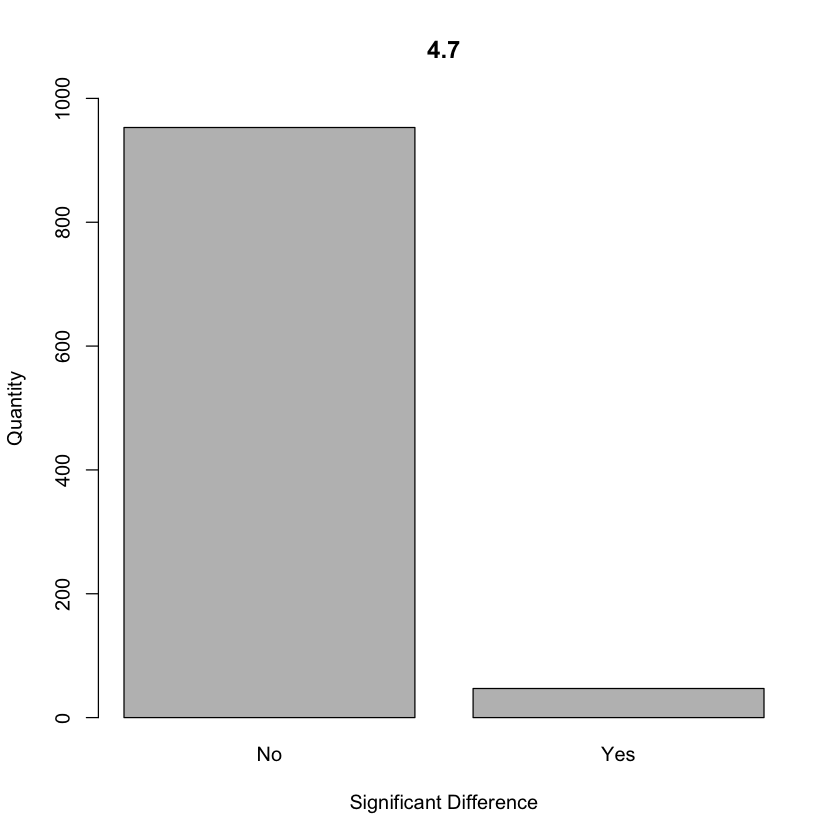

In [57]:
false_alarm(2, 60, 0.05)

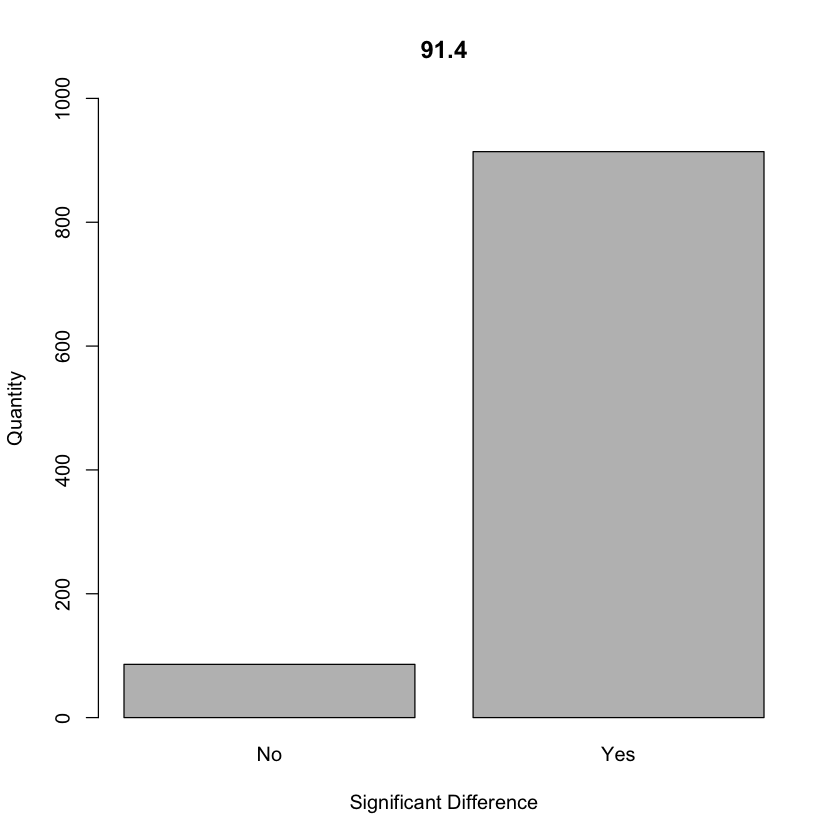

In [58]:
false_alarm(20, 60, 0.05)

In [3]:
df <- read.csv("https://stepik.org/media/attachments/lesson/8083/genetherapy.csv")

gr_df <- df %>%
   group_by(Therapy) %>%
   summarise( N = n(),
              Mx = mean(expr),
              SD = sd(expr),
              y_max=Mx+1.96*sd(expr)/sqrt(N),
              y_min=Mx-1.96*sd(expr)/sqrt(N))
gr_df

da <- aov(expr~Therapy, data=df)
da

summary(da)

Therapy,N,Mx,SD,y_max,y_min
A,15,99.73333,4.165619,101.84143,97.62524
B,15,98.80000,5.894307,101.78293,95.81707
C,15,94.40000,5.193402,97.02822,91.77178
D,15,92.33333,3.735289,94.22365,90.44302


Call:
   aov(formula = expr ~ Therapy, data = df)

Terms:
                  Therapy Residuals
Sum of Squares   560.7167 1302.2667
Deg. of Freedom         3        56

Residual standard error: 4.822319
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value   Pr(>F)    
Therapy      3  560.7  186.91   8.037 0.000152 ***
Residuals   56 1302.3   23.25                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [6]:
tukey <- TukeyHSD(da)
tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = expr ~ Therapy, data = df)

$Therapy
          diff        lwr        upr     p adj
B-A -0.9333333  -5.595897  3.7292308 0.9514195
C-A -5.3333333  -9.995897 -0.6707692 0.0188860
D-A -7.4000000 -12.062564 -2.7374358 0.0005424
C-B -4.4000000  -9.062564  0.2625642 0.0710413
D-B -6.4666667 -11.129231 -1.8041025 0.0029443
D-C -2.0666667  -6.729231  2.5958975 0.6457935


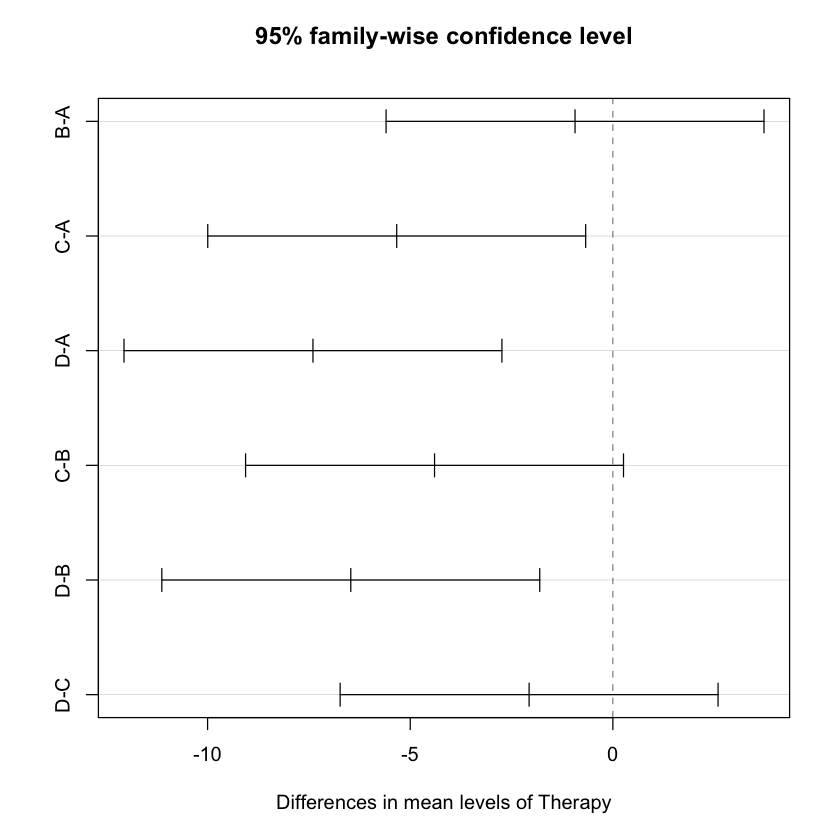

In [7]:
plot(tukey)

## Multifactor ANONA

In [21]:
data <- read.csv("https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv")
head(data, 4)


expr,age,dose
107.3515,1,D1
104.5044,1,D1
103.4351,1,D1
109.5729,1,D1


In [22]:
aov <- aov(expr~age+dose, data=data)

summary(aov)

            Df Sum Sq Mean Sq F value Pr(>F)   
age          1  197.5  197.45   7.570 0.0078 **
dose         1   16.9   16.91   0.648 0.4238   
Residuals   61 1591.2   26.08                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [24]:
aov2 <- aov(expr~age*dose, data=data)

summary(aov2)

            Df Sum Sq Mean Sq F value  Pr(>F)   
age          1  197.5  197.45   7.450 0.00831 **
dose         1   16.9   16.91   0.638 0.42755   
age:dose     1    0.9    0.93   0.035 0.85227   
Residuals   60 1590.3   26.50                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [26]:
TukeyHSD(lm(expr~age*dose, data=data))

ERROR: Error in UseMethod("TukeyHSD"): no applicable method for 'TukeyHSD' applied to an object of class "lm"


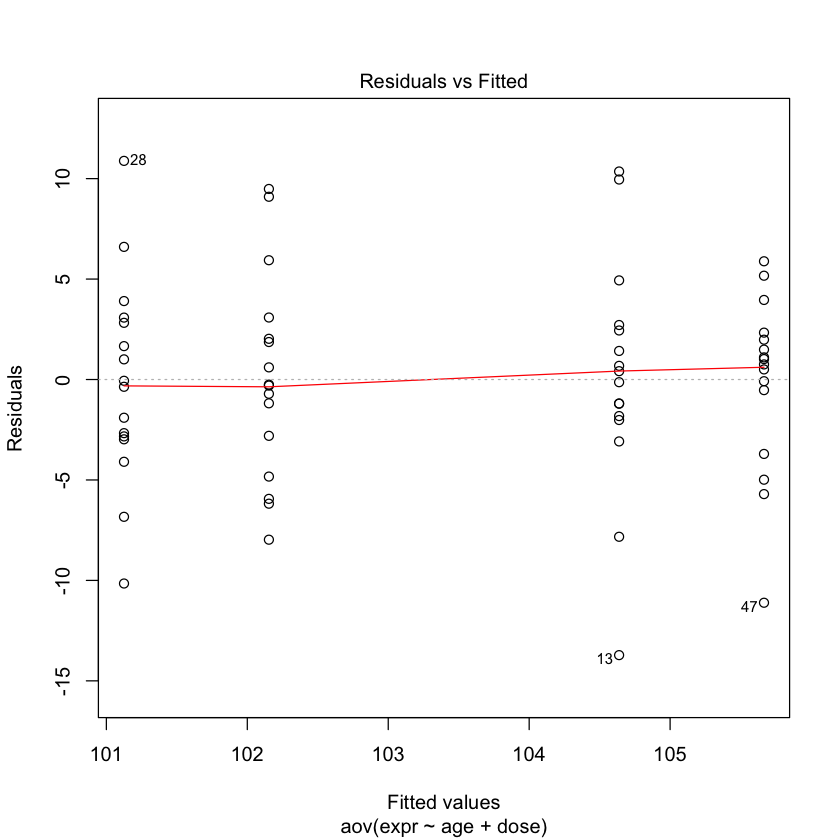

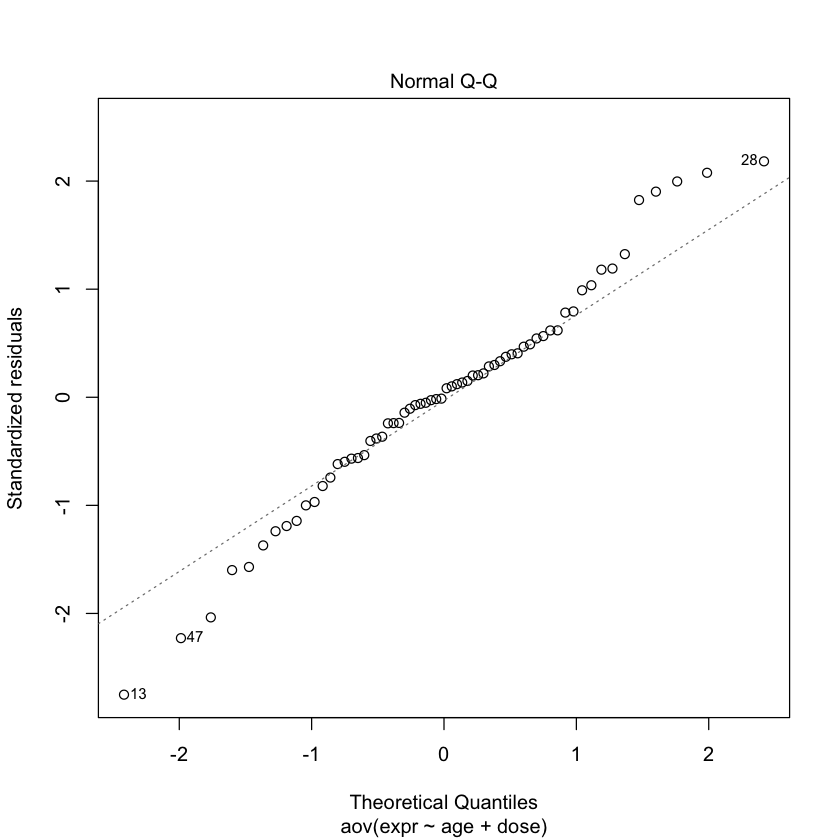

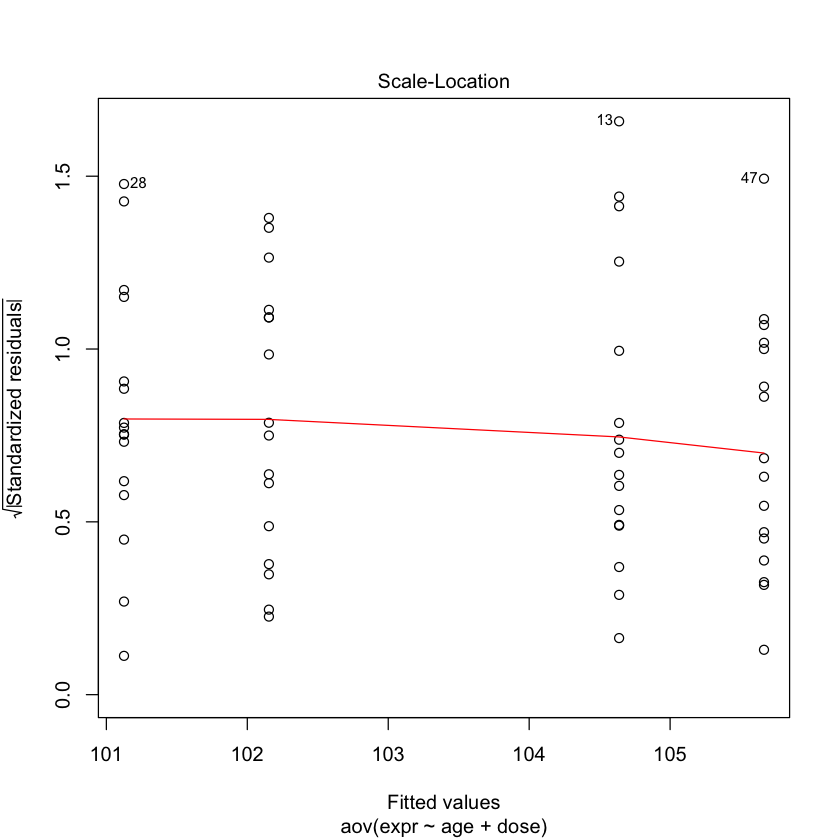

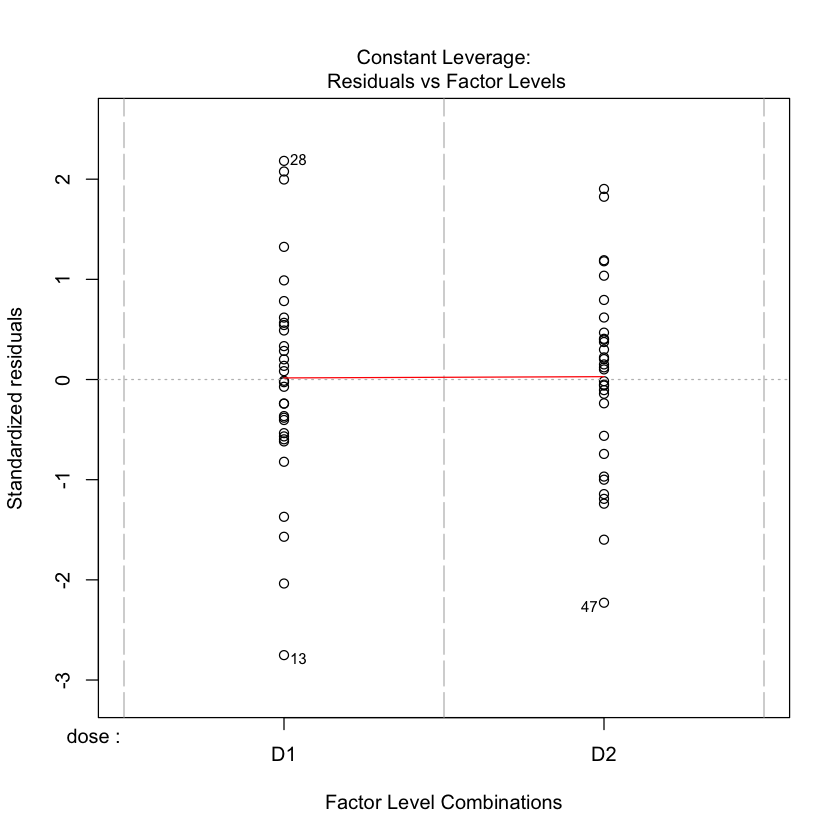

In [23]:
plot(aov)

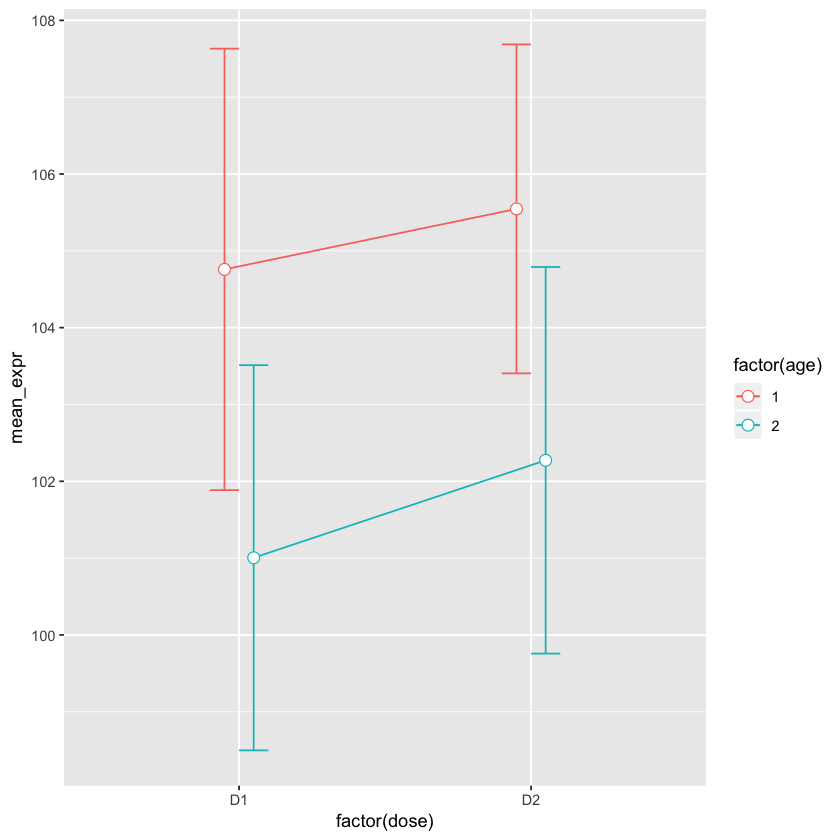

In [84]:
se_data <- data %>%
                 group_by(age, dose) %>%
                 summarise(mean_expr = mean(expr), 
                     y_max = mean(expr) + 
                         1.96 * sd(expr) / sqrt(length(expr)), 
                     y_min = mean(expr) - 
                         1.96 * sd(expr) / sqrt(length(expr)))



ggplot(se_data, aes(x = factor(dose), y = mean_expr, 
                    col = factor(age), 
                    group = factor(age))) +
    geom_line(position = position_dodge(0.2))+
    geom_errorbar(aes(ymin = y_min, ymax = y_max), width = 0.2, position = position_dodge(0.2)) +
    geom_point(shape = 21, size = 3, fill = "white", position = position_dodge(0.2))

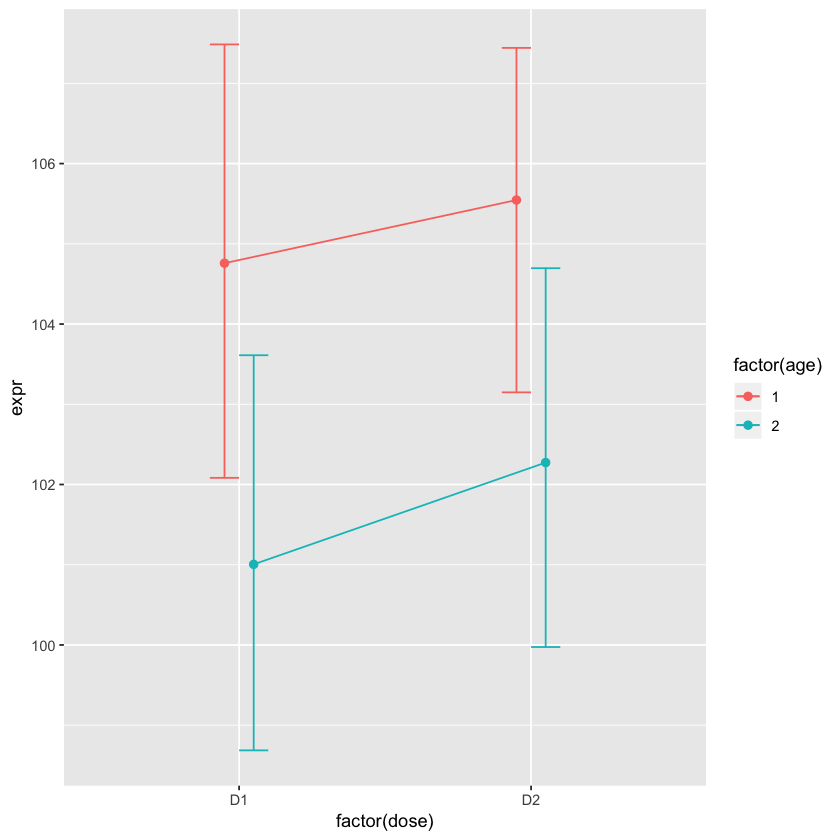

In [88]:
ggplot(data, aes(factor(dose), expr, col = factor(age), 
                   group = factor(age))) + 
    stat_summary(fun.data = mean_cl_boot, geom = "errorbar", 
                 width = 0.2, position = position_dodge(0.2)) + 
    stat_summary(fun.data = mean_cl_boot, geom = "point", size = 2, position = position_dodge(0.2)) +
    stat_summary(fun.y = mean, geom = "line", position = position_dodge(0.2))    

In [37]:
data <- read.csv("https://stepik.org/media/attachments/lesson/9250/birds.csv")
data$hormone <- as.factor(data$hormone)
data$sex <- as.factor(data$sex)
head(data, 3)

var4,hormone,sex
17.85904,1,1
20.84234,1,1
19.31810,1,1


In [43]:
aov <- aov(var4 ~ hormone*sex, data=data)


summary(aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
hormone      1    0.8    0.85   0.087 0.76965   
sex          1    0.1    0.12   0.012 0.91232   
hormone:sex  1   89.5   89.48   9.136 0.00368 **
Residuals   60  587.7    9.79                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [40]:
tukey <- TukeyHSD(aov)
tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = var4 ~ hormone * sex, data = data)

$hormone
          diff       lwr     upr     p adj
1-0 -0.2301456 -1.795161 1.33487 0.7696534

$sex
         diff       lwr      upr     p adj
1-0 0.0865168 -1.478498 1.651532 0.9123185

$`hormone:sex`
              diff        lwr       upr     p adj
1:0-0:0 -2.5950370 -5.5189023 0.3288283 0.0992483
0:1-0:0 -2.2783746 -5.2022400 0.6454907 0.1784178
1:1-0:0 -0.1436288 -3.0674941 2.7802366 0.9992099
0:1-1:0  0.3166623 -2.6072030 3.2405277 0.9917454
1:1-1:0  2.4514082 -0.4724571 5.3752736 0.1307165
1:1-0:1  2.1347459 -0.7891195 5.0586112 0.2268837


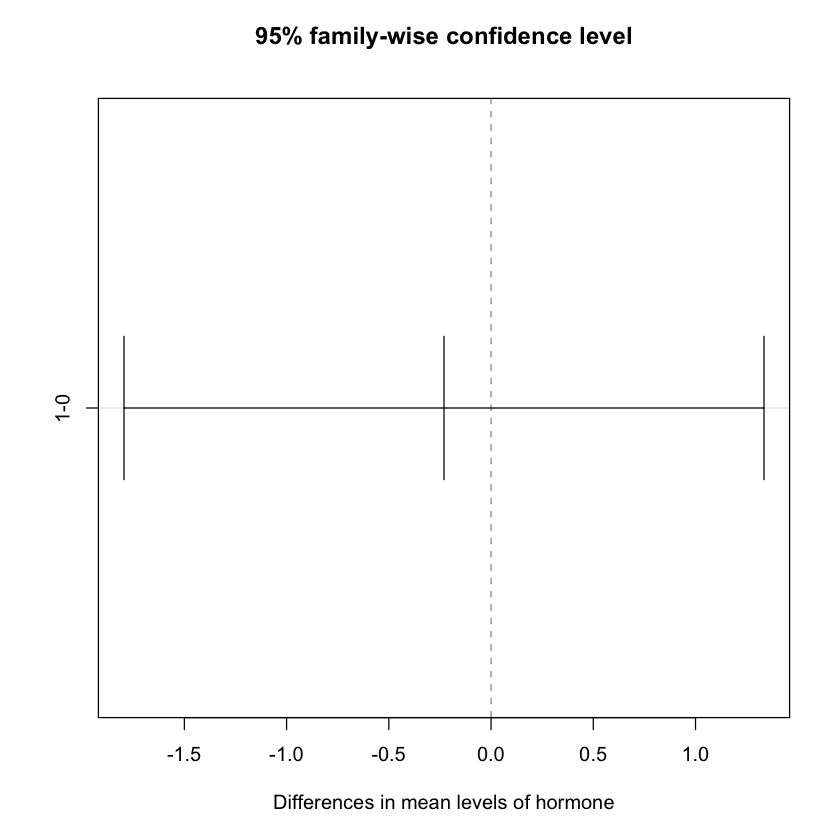

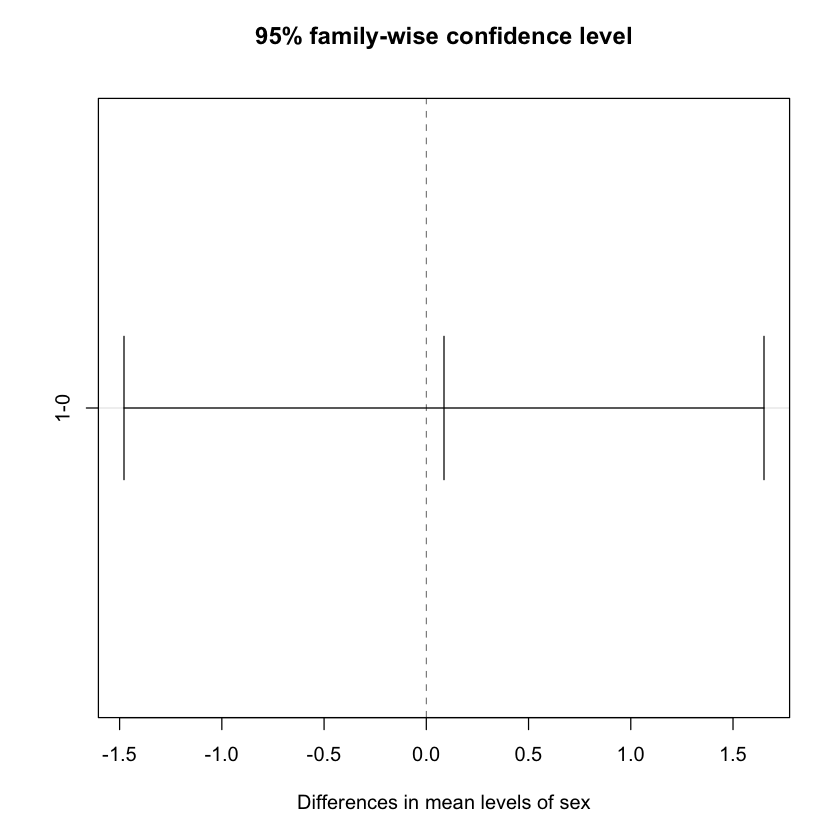

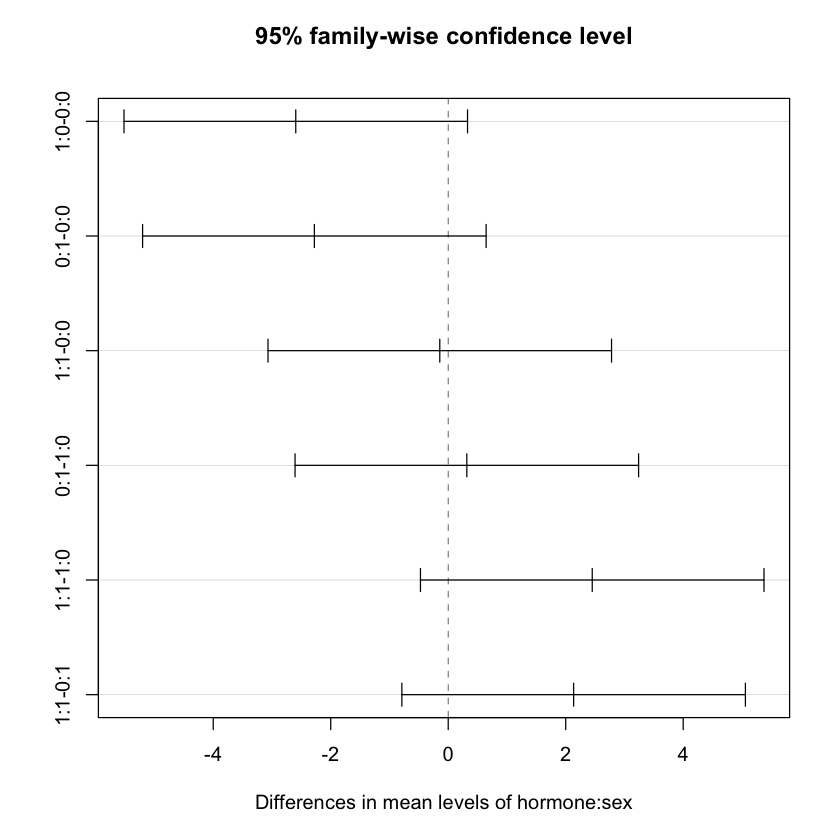

In [41]:
plot(tukey)

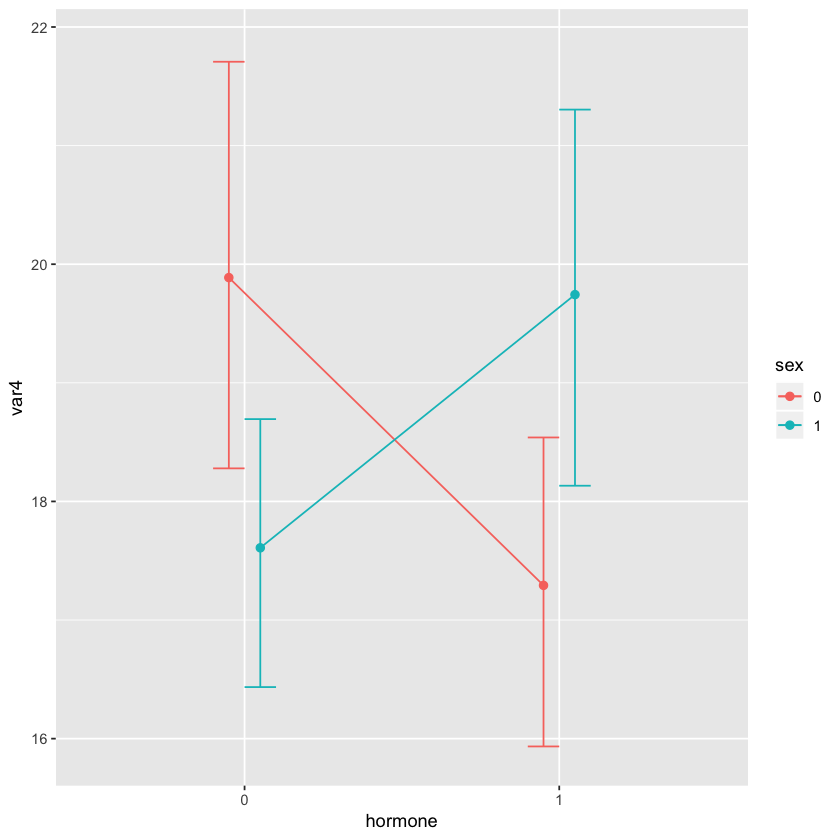

In [44]:
ggplot(data, aes(hormone, var4, col = sex, 
                   group = factor(sex))) + 
    stat_summary(fun.data = mean_cl_boot, geom = "errorbar", 
                 width = 0.2, position = position_dodge(0.2)) + 
    stat_summary(fun.data = mean_cl_boot, geom = "point", size = 2, position = position_dodge(0.2)) +
    stat_summary(fun.y = mean, geom = "line", position = position_dodge(0.2))    

# Correlation and Linear Regression

## Definitions of Covariance and Correlation

How we can describe the extent of relation between some variables? We can use the correlation coefficient. It varies from -1 to 1; a negative value corresponds to negative linear relation while a positive value tells us about positive linear relation and zero means that the variables are perfectly independent. Thus, the absolute value of the correlation coefficient tells us how strong the relation is.

How to calculate the coefficient? 

$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$

$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

The main advantage of this coefficient is that it can take a value between -1 (perfect negative connection) and 1 (absolute positive connection).


Now let’s discuss how to interpret the result. The tricky thing in any correlation study is that correlation doesn’t necessarily mean that one variable depends on the other variable. The data tell us only about connection between the variables, and we know nothing about the direction of causality. On the one hand the, X may provoke Y. On the other had, Y may provoke X. 

In other words, the claim “Correlation does not imply causation” is about not only correlation coefficient but it is rather about all the methods in statistics. And if you apply complicated analysis of variance it doesn't automatically mean that you are testing causal hypotheses.

You are testing causal hypotheses if you use experimental method in you study, the statistical method does not matter. You can test causal experimental causal hypothesis using correlation coefficient in case you have appropriate experimental design. But this topic unfortunately goes beyond the limits of this course.

But it’s one of the main thing to know about statistics. A significant result does not mean that your conclusion is right.

**Assumptions, or what you need to know before applying the correlation coefficient**


The correlation coefficient is a good way to test hypotheses about connection between variables. However, there are some limitations of this method. Let’s discuss situations when applying the correlation coefficient won’t be the best idea.

1. The correlation coefficient is meaningful only to linear and monotone relationships. Let’s look on the example of nonlinear and non-monotone relationship to demonstrate why. 

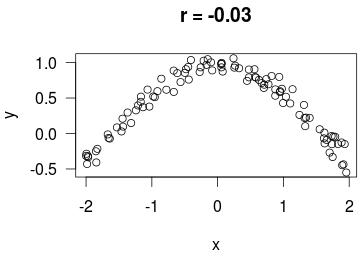




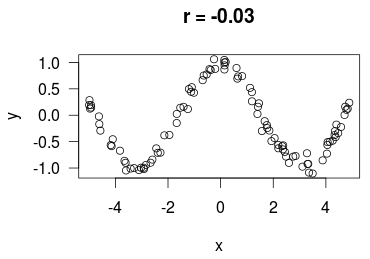

In each case, the two variables are definitely connected. However, the correlation coefficient would be very close to zero. We might even conclude that there is no any connection unless make have a scatter plot to check this out. It’s easy to demonstrate a lot of examples that types of relationships where correlation will be meaningless measure of variables connection.

2. The second assumption tells us that correlation coefficient requires approximately normal distribution of the variables. There are two reason for that assumption. 

    a. First, it's about outliers. 
    

Let's consider the following example. You can see that most of the data points demonstrate positive correlation, while only a few observations deviate strongly from the trend. 

Anyway, it’s obvious that it would be reasonable to characterize the relation between variables as positive. However, if we calculate the coefficient if will be approximately equal to zero (and even negative). The reason is that we sample means to calculate the coefficient. As we know, only one outlier can affect the sample mean dramatically. 

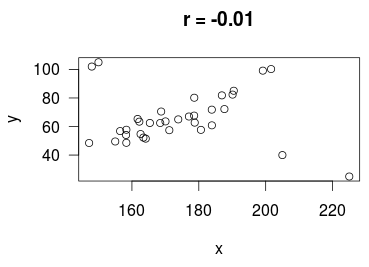

What should we do if we have some outliers? The outliers can have two different source of origins. First, they can stem from a measurement error. For instance, you can find out that one of subjects is 180 years old or has a mean grade of -100. Obviously, we have an extra symbol in the each case. We could type in accidentally. In this situation if you don't have true values the best way is just to remove this outliers, since these data points are absolutely meaningless. The second possible scenario is a little bit more complicated. Outliers can deviate greatly from the rest of the data but, however, still remain sensible observations. Then we can't just remove all the data that contradict a desirable trend. To handle this situations we can use non-parametric analog of Pearson correlation coefficient called Spearman coefficient. 
The Spearman correlation coefficient transform the data to the rank scales and then can be used to describe association between variables. The key logic of that transformation is that outliers does not affect the rest of the data dramatically anymore. Let’s compare Pearson and Spearman coefficient on the previous example. Look, the Pearson correlation is equal to zero, and it tells us there is no significant correlation while Pearson coefficient allows us to reject null hypothesis, that is more reasonable conclusion.    


        b. The second reason is a little bit complicated. I told you that the t-statistics follows a t-distribution with N-2 degrees of freedom. This is definitely true when the variables have a normal distribution in population, otherwise the assumption of t-distribution can be violated. As a result, the observed p-value might be inaccurate, which can lead us to wrong statistical decision. In the other hand, some statistical tutorials tell us that Pearson correlation coefficient is robust to violation of that assumption if we use sample size greater than 50 observations. However, I recommend that you check the distribution of the variables anyway. Use histograms or density plot and combine correlation analysis with scatter plot, because it helps you to detect both nonlinear relation and outliers as well.


	Pearson's product-moment correlation

data:  x and y
t = 0.37209, df = 48, p-value = 0.7115
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2281241  0.3270940
sample estimates:
       cor 
0.05362896 


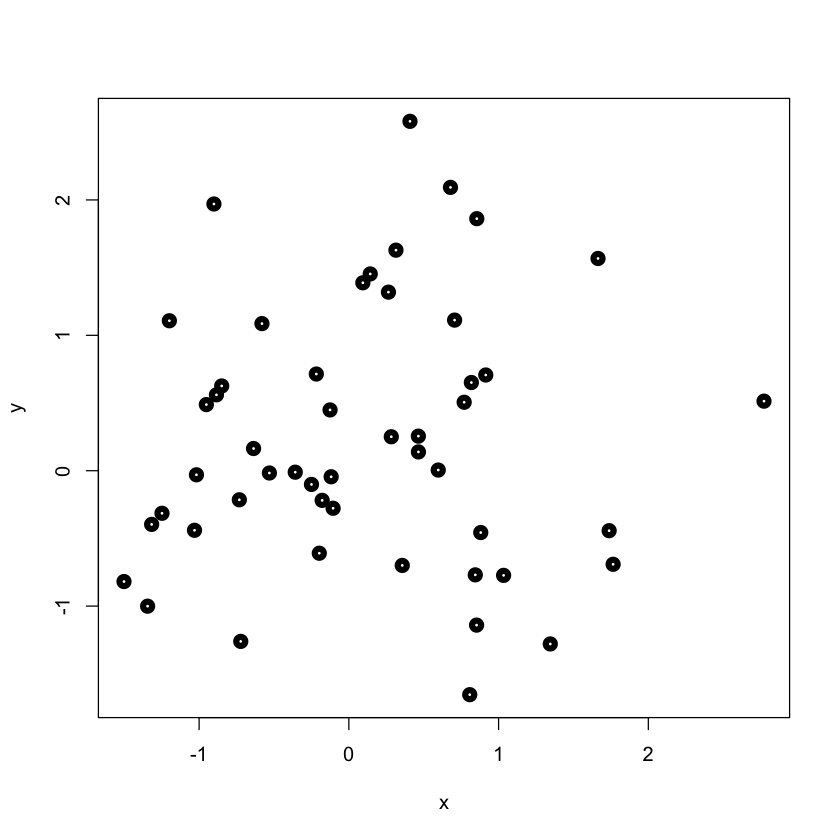

In [45]:
N <- 50
x <- rnorm(n = N, mean = 0, sd  = 1)
y <- rnorm(n = N, mean = 0, sd  = 1)
plot(x, y, lwd=5)
cor.test(x, y)

## Simple Linear Regression

Let's return to our example of relationship between person's height and weight. 

We definitely have some positive connection here. Now, as I have already mentioned that the relation two variables can be represented by a straight line, called a regression line.
Does any line represent the relationship well? Of course no. It’s obvious that a red line fits the data better than the green one. However, what should we use to measure the quality of the line and how can we choose the best one?



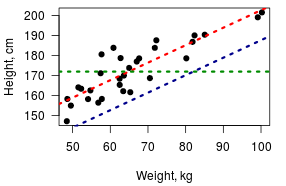

First of all, let’s introduce a general answer to this question. We want the line to represent the direction of the relationship, so the red line is better compared with the green one. We also want the line to represent the cloud of all observations. In other words, we want to place the line in the center of all the observations. Thus, the green line is better compared with the blue one. Now think about this way, suppose we want to replace all the observations with a one line. Then the line must predict the initial locations of the observations as good as possible. For an instance, the red line predicts that a person with a weight of 65 kilos is about 165 cm tall (remember, we're not speaking about cause-and-effect relationship right now).  

Now let’s introduce a more formal indicator of line quality. Look: we can draw a vertical line to calculate how far each observation falls from the regression line. These differences are called errors, or residuals. The errors for each observations can be represented by these red lines.

Well, it’s pretty logical to replace all the observations with the line that has the minimal values of errors. As a result to estimate quality of the approximation we could use sum of errors. However, in this case the positive deviations and the negative ones will sum up to something close to zero. How we can fix it? We have already met this problem! We can square the residuals and sum them up. This metric is called Residual Sum of Squares, or just RSS. The better the line fits the data, the smaller RSS value we have. Now we need to find a line with minimal RSS. What does it mean "to find a line"? 

I hope you remember from school that any line can be defined by two coefficients: slope and intercept. Look at the line equation:
$$ \hat{y} = b_0 + b_1x $$

The $b_{1}$ is coefficient, or slope, is the "steepness" of the line and $b_{0}$ is the, of the point where the line crosses the y-axis. And our goal is to find such values of slope and intercept that would minimize RSS.

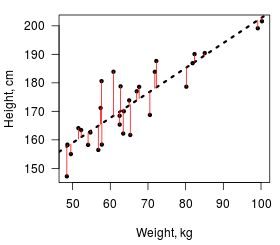

Ordinary least squares

To find the values of slope and intercepts, the ordinary least squares (OLS) method is usually used. We have already introduced the idea behind the method: we want to find such values of coefficients that RSS will be minimal.

This process may seem a bit complicated, so we will consider only a simplified example to introduce the main idea.

Let's consider an extremely simplified example with 3 data points: (1, 1), (2, 2) and (6, 6). I think you can easily guess the slope coefficient but let's get it.  

As we already know, RSS is equal to the sum of squared errors, and the expected value of $\hat{y}$ is  equals the value of x multiplied by the slope (b). Let's calculate it!

$$ RSS =  (\hat{y} - y_{1})^2 + (\hat{y} - y_{2})^2 + (\hat{y} - y_{3})^2 $$

We can replace the expected values of y with the x values multiplied by slope:

$$ RSS =  (x_{1}*b- y_{1})^2 + (x_{2}*b - y_{2})^2 + (x_{3}*b - y_{3})^2 $$

As we know the actual x and y values for our example, let's go on, substitute them and process this expression:

$$ RSS =  (1*b- 1)^2 + (3*b - 3)^2 + (6*b - 6)^2 = 46 * (b - 1)^2$$

Look, we have a quadratic equation as a result! We can plot the relationship between RSS and b (our slope value) and have a parabola.

This parabola has a minimum if the slope value equals 1. It's clear from the plot (or, if you wish to solve this directly, you can differentiate this expression Again, it's obviously 1.
As a result the regression line y equals x multiplied by b is the best regression line, and if we want to minimize RSS in our sample data, this line will be the best choice.



Now let’s summarize the main idea of the procedure. To fit the regression line we minimized sum of residual squares. We found out that RSS was a function of b, the task was only to find the minimum of that function. Of course, mathematicians don't find minimum only looking at a plot like we did. Anyway, I hope now you understand the main idea of the ordinary least square method. If the RSS is a function of coefficients, all we need is to find the minimum of that function.


In case a regression line has both slope and intercept the function of RSS can be presented as parabola in a 3D space, and like in our previous example we can easily find minimum values of both coefficients which correspond to the minimum value of RSS. And if we solve the equation to find coefficients in general terms we will get the following answer: slope is equal to b1 and intercept is equal to b0. These coefficients will fit the line with the minimum RSS.  

In [47]:
states <- read.csv("https://stepik.org/media/attachments/lesson/8086/states.csv")
head(states)

state,metro_res,white,hs_grad,poverty,female_house
Alabama,55.4,71.3,79.9,14.6,14.2
Alaska,65.6,70.8,90.6,8.3,10.8
Arizona,88.2,87.7,83.8,13.3,11.1
Arkansas,52.5,81.0,80.9,18.0,12.1
California,94.4,77.5,81.1,12.8,12.6
Colorado,84.5,90.2,88.7,9.4,9.6


In [63]:
summary(states[,c('hs_grad', 'poverty')])

    hs_grad         poverty     
 Min.   :77.20   Min.   : 5.60  
 1st Qu.:83.30   1st Qu.: 9.25  
 Median :86.90   Median :10.60  
 Mean   :86.01   Mean   :11.35  
 3rd Qu.:88.70   3rd Qu.:13.40  
 Max.   :92.10   Max.   :18.00  

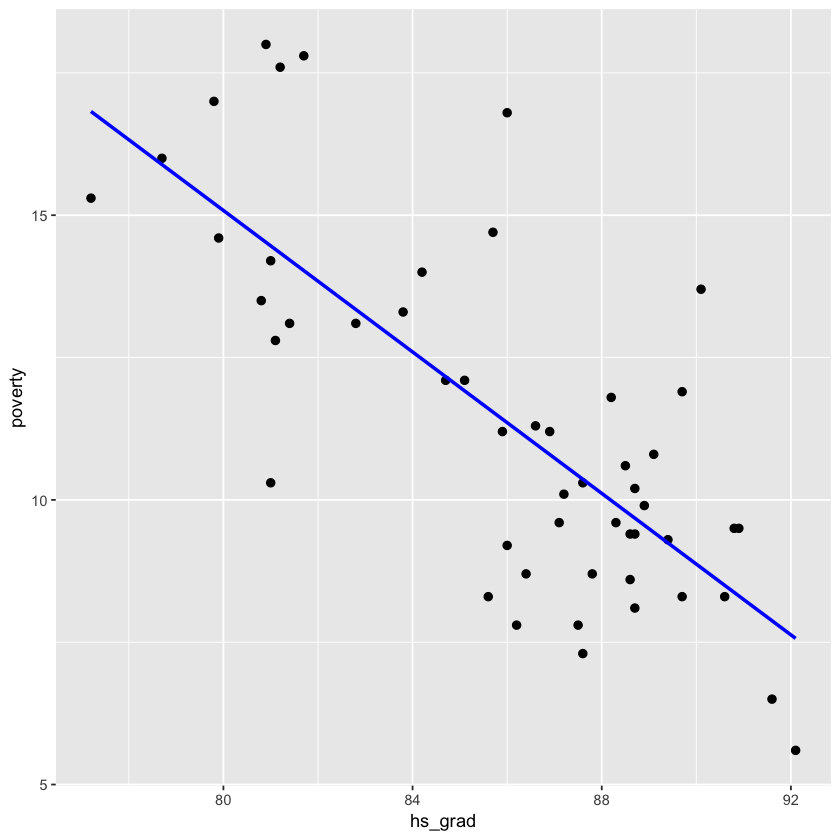

In [67]:
ggplot(states, aes(hs_grad, poverty))+
  geom_point(size=2)+
  geom_smooth(method = 'lm', col='blue', se=FALSE)+
  theme(plot.title = element_text(hjust = 0.5))

In [53]:
cor.test(states$hs_grad, states$poverty)


	Pearson's product-moment correlation

data:  states$hs_grad and states$poverty
t = -7.8619, df = 49, p-value = 3.109e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8479211 -0.5934117
sample estimates:
       cor 
-0.7468583 


In [65]:
model <- lm(poverty~hs_grad, data=states)
summary(model)


Call:
lm(formula = poverty ~ hs_grad, data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1624 -1.2593 -0.2184  0.9611  5.4437 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.78097    6.80260   9.523 9.94e-13 ***
hs_grad     -0.62122    0.07902  -7.862 3.11e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.082 on 49 degrees of freedom
Multiple R-squared:  0.5578,	Adjusted R-squared:  0.5488 
F-statistic: 61.81 on 1 and 49 DF,  p-value: 3.109e-10


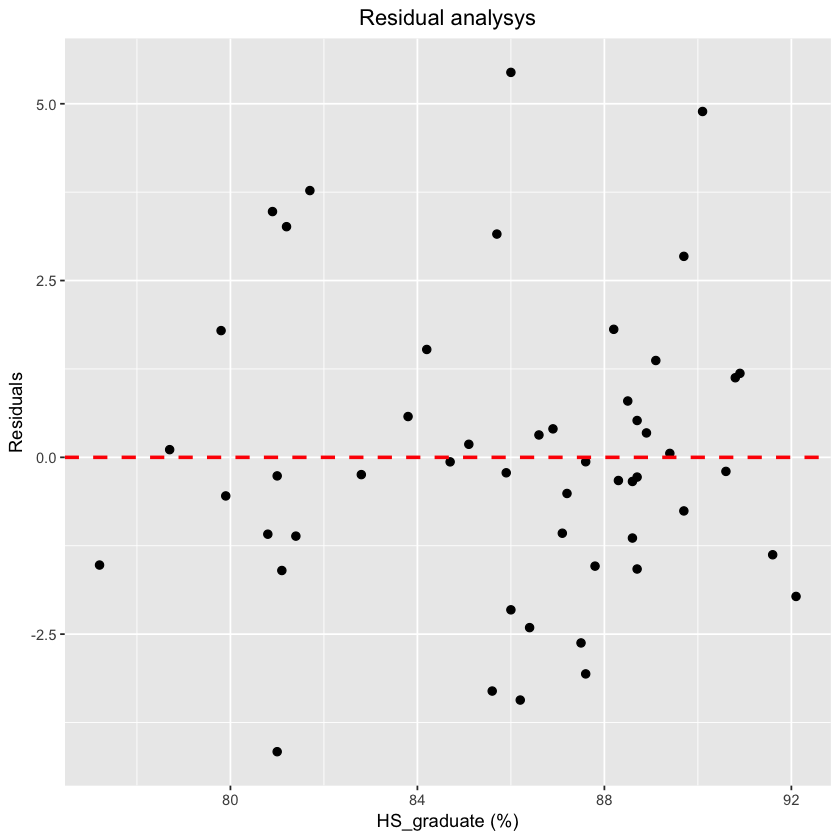

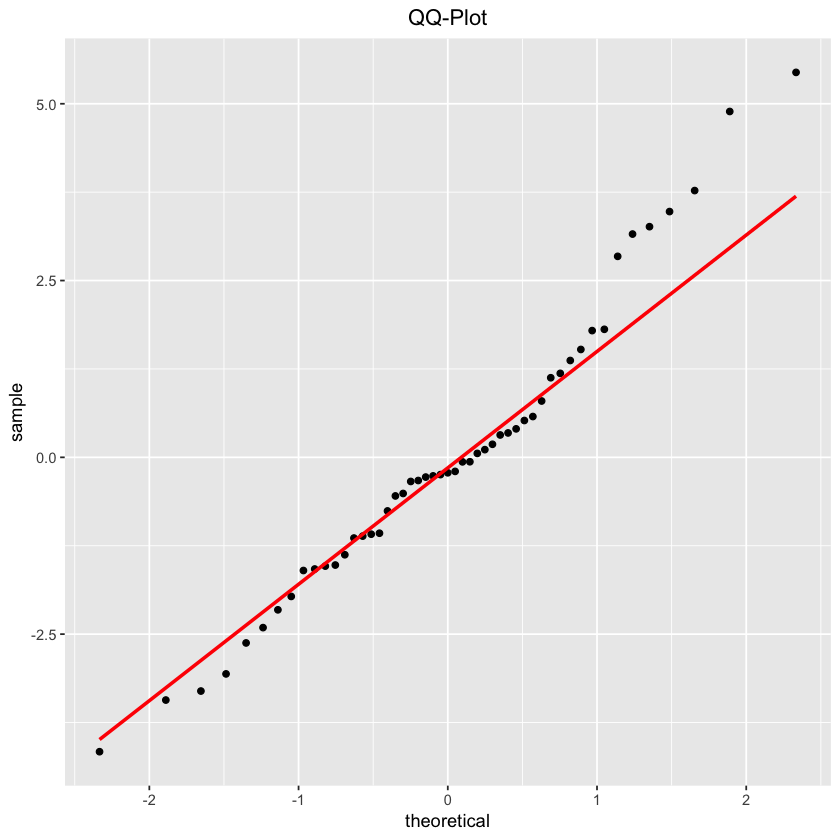

In [68]:
res <- data.frame(states$hs_grad, model$residuals)
colnames(res) <- c('hs_grad', 'residuals')

ggplot(res, aes(hs_grad, residuals))+
  geom_point(size=2)+
  geom_hline(yintercept=0, colour="red", linetype="dashed", lwd=1)+
  scale_y_continuous(name = 'Residuals')+
  scale_x_continuous(name = 'HS_graduate (%)')+
  ggtitle('Residual analysys')+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(res, aes(sample = residuals))+
  stat_qq()+
  stat_qq_line(lwd=1, col='red')+
  ggtitle('QQ-Plot')+
  theme(plot.title = element_text(hjust = 0.5))

## Predictions from Linear Regression

If we have a model of the connection between two variables, we can use it to make predictions. Suppose we know that a person's height is 182 cm. What should we expect about their weight? We can make a prediction using our model. We are already familiar with the procedure.

$$ \hat{y} = b_0 + b_1x = -82.92 + 0.86 * 182 = 73.6$$

Now I have to make some very important comments about the prediction procedure. First of all, we must remember that all the predictions in statistics have probabilistic nature. Look at the plot again: we have made a prediction using a regression line actually, while the line have a confidence interval; as a result, our prediction, has a predictive interval as well.
We can also hear the conclusion that our regression model predicts the y value to be equal to something. This kind of report can be both very useful and absolutely pointless. For example, two regression models can make the same prediction but with different accuracy. Most statistical packages allow users to calculate the predictive interval for a new observation of dependent variables. I strongly advise you to include this interval in your report.

The second tricky moment is about extrapolation limits. Suppose we built a regression model to predict weight for a known height. However, if we would like to predict the weight of a newborn 52-cm baby, we would get a negative value (you can easily calculate it). For a 1-meter tall kid it would predict the weight of about 3 kilos, which is also absurd. Why does it happen? First, we didn't have children in our sample. Second, we cannot be sure that there is a linear relationship between height and weight for people of any age. 
So, I recommend that you predict the values not far from the interval where you have actual values.

### Assumptions

There is a list of assumptions of simple linear regression. Some of them are similar with the correlation coefficient assumption actually. Let’s discuss it step by step.

- Linear regression requires linearity of relationship between dependent and independent variables. We have already mentioned this assumption in context of correlation coefficient, and the main idea stays the same. Linear regression approximates the relationship linearly, and the regression model is a straight line. That why it’s absolutely meaningless to try using linear regression to approximate nonlinear relationship between variable.From mathematical point of view there is no problem to calculate the regression coefficients. However, it’s obvious that this line does not represent the data at all. The predictions of the model are also absolutely meaningless. And like the correlation coefficient, simple linear regression does not reflect many aspects of nonlinear relationships.

- The second assumption about independence of observations has been already discussed in the previous lessons. And linear regression is not an exсeption.

- The next assumption is also familiar: normal distribution. Why do we need normal distribution to use linear regression? There are some reasons.

   - a. The first reason is about outliers in the data. This is a familiar problem when only a few observations can affect the coefficients dramatically because we use sample means to calculate them. As a result, the summary can tells us about significant slope while this is a result only of one observation.
   
   - b. The second reason is mathematical. It’s possible that if the variables distribution deviates greatly from normal distribution, slope divided by SE would also deviate from the t-distribution. As a result, the computation of the p-value can go wrong. So, this is a good idea to check the shape of distributions. I have already told you that it’s possible to combine scatter plot with density plots it can help.

- The next assumption is called homoscedasticity. It means that the variance of residuals should be the same across all levels of the independent variables. The opposite situation is called heteroscedasticity. Slight heteroscedasticity has little effect on significance tests while marked heteroscedasticity can lead to serious distortion of findings increasing the possibility of a Type I error.


## Multiple Linear Regression

So, now we’re on good terms with simple regression. Let’s move on and see how to work with several independent variables into our model.

However, in many cases we have many more than one variable we would like to incorporate into our model. For example, if we want to know whether the poverty level is also influenced by the % of white people. We can go on and have the following model:

$$ y = b_{0} + b_{1} * x_{1} + ... + b_{n} * x_{n} $$

As you can see, when we have more than one independent variable, it’s very hard (almost impossible) to visualize the relationship. Let’s concentrate on how to analyze this.

Let’s consider some assumptions﻿.
You might now have a temptation to include all data you have in one model, but you might have some problems on this way.

Let’s go step by step.

The main assumptions are the same.

- Linear relationship of the variables.
- Normal distribution of the residuals.
- Homoscedasticity.
- Multicollinearity check.
- Normal distribution for all variables. This is not an absolute requirement (different specialists have different opinions) but still it would be good.

Warning message:
“package ‘scatterplot3d’ was built under R version 3.6.1”The following object is masked _by_ .GlobalEnv:

    state



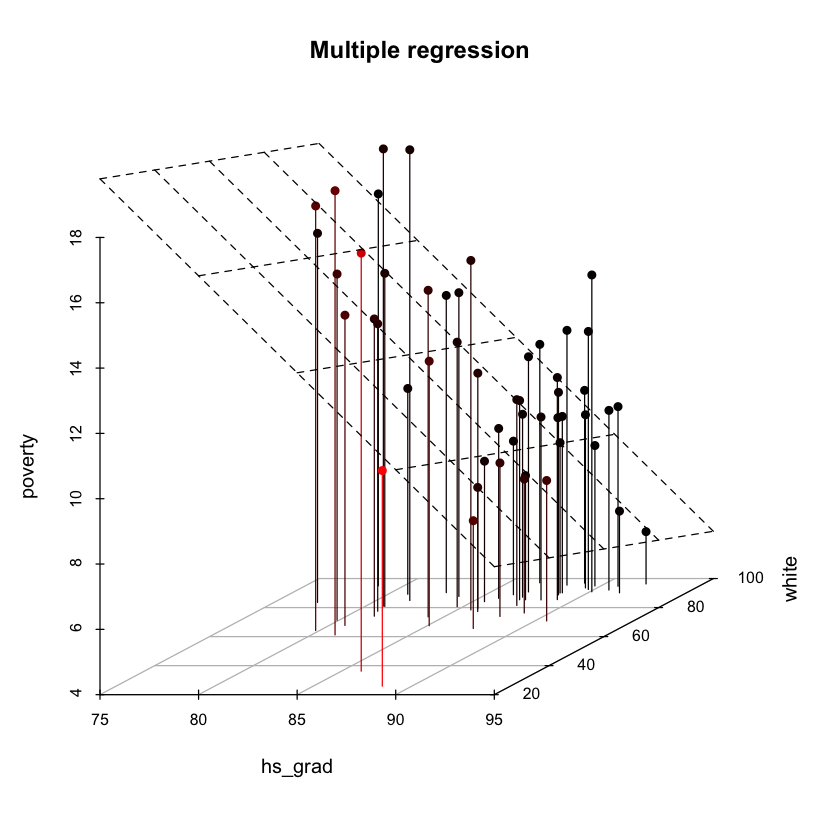

In [71]:
library(scatterplot3d)

attach(states)
s3d <-scatterplot3d(hs_grad, white, poverty, pch=16, highlight.3d=TRUE,
type="h", grid = TRUE, box = FALSE, main="Multiple regression")
fit <- lm(poverty ~ hs_grad + white)
s3d$plane3d(fit)

In [73]:
model <- lm(poverty~metro_res + white + hs_grad + female_house, , data=states)
summary(model)


Call:
lm(formula = poverty ~ metro_res + white + hs_grad + female_house, 
    data = states)

Residuals:
   Min     1Q Median     3Q    Max 
-3.289 -1.506 -0.323  1.235  4.449 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  66.47653   12.58990   5.280 3.41e-06 ***
metro_res    -0.05632    0.01955  -2.881    0.006 ** 
white        -0.04814    0.03306  -1.456    0.152    
hs_grad      -0.55471    0.10491  -5.288 3.33e-06 ***
female_house  0.05054    0.24330   0.208    0.836    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.934 on 46 degrees of freedom
Multiple R-squared:  0.6416,	Adjusted R-squared:  0.6104 
F-statistic: 20.58 on 4 and 46 DF,  p-value: 8.884e-10


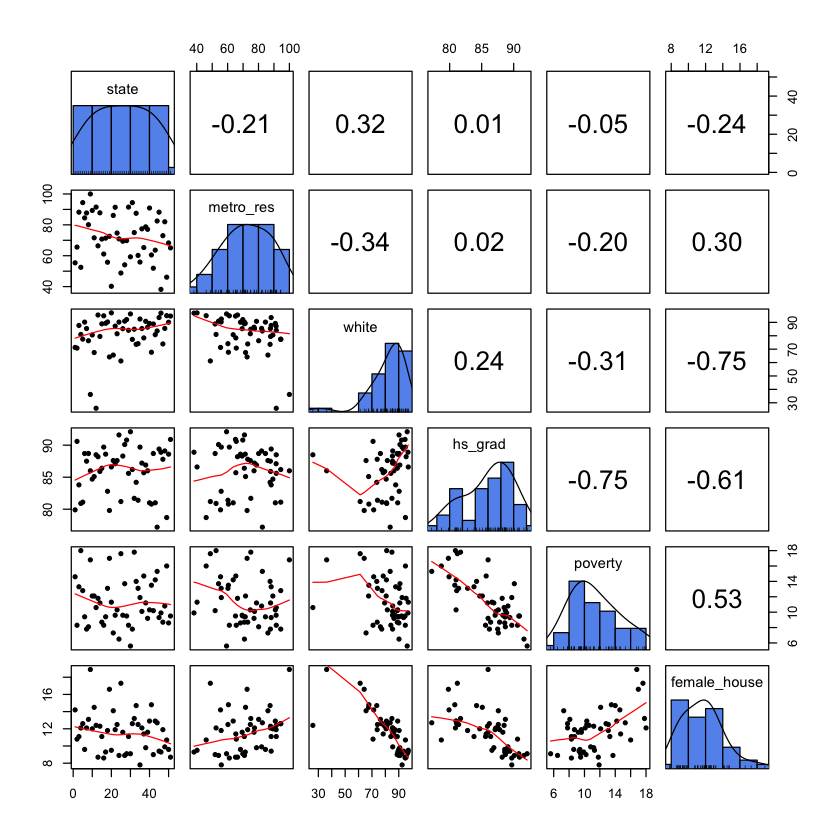

In [78]:
library(psych)
data <- subset(states, select = -c(state))
pairs.panels(states, method = "pearson",
             hist.col = "cornflowerblue",
             density = T, ellipses = F)

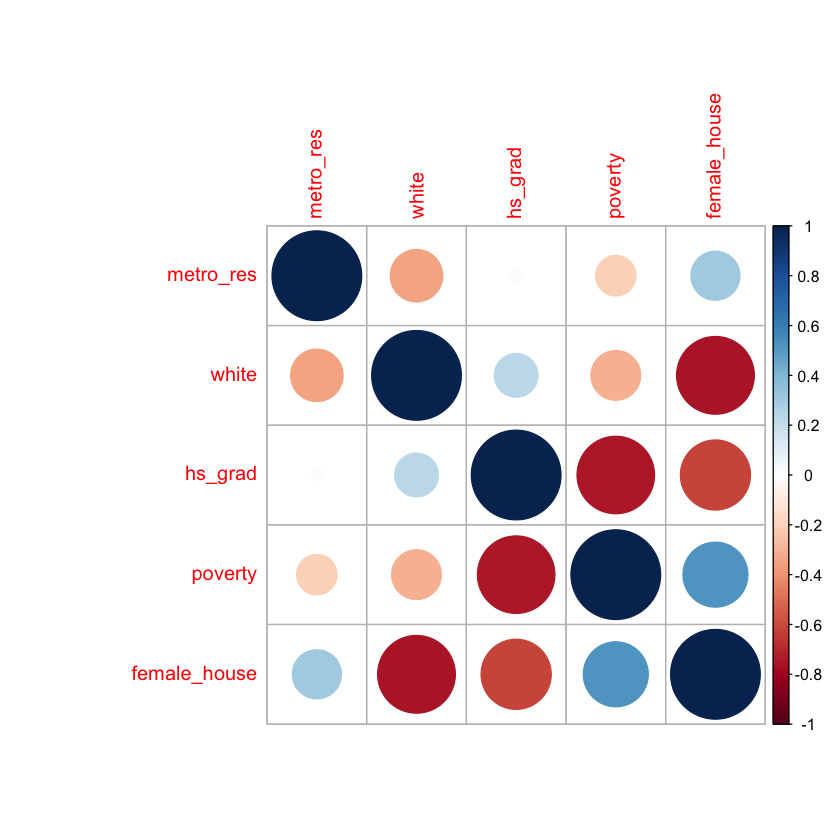

In [76]:
library(corrplot)
M <- cor(states[2:6])
corrplot(M)